# Определение перспективного тарифа для телеком-компании

## Описание проекта

На исследование представлено два тарифных плана: «Смарт» и «Ультра» телеком-компании «Мегалайна». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 

В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Требуется проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифных планов

Тариф *«Смарт»*

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф *«Ультра»*

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Чтение данных
### Просмотр файлов

In [1]:
# необходимые для анализа бибилиотеки
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение, представленных на анализ файлов
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
# просмотр прочитанных файлов
display(calls.head())
print('Таблица 1. Данные звонков')
display(internet.head())
print('Таблица 2. Данные интернет-соединений')
display(messages.head())
print('Таблица 3. Данные по отправленным сообщениям')
display(tariffs.head())
print('Таблица 4. Тарифные планы')
display(users.head())
print('Таблица 5. Пользовательские данные')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица 1. Данные звонков


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Таблица 2. Данные интернет-соединений


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица 3. Данные по отправленным сообщениям


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица 4. Тарифные планы


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица 5. Пользовательские данные


**Вывод**

Данные прочитались корректно.

### Описание данных

Таблица **users** (информация о пользователях):

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tarif — название тарифного плана

Таблица **calls** (информация о звонках):

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

Таблица **messages** (информация о сообщениях):

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

Таблица **internet** (информация об интернет-сессиях):

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

Таблица **tariffs** (информация о тарифах):

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в 
месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Предобработка данных

### Общие условия предобработки данных

«Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

In [4]:
# приведение типов данных к соответсвию содеражанию
# округление значений, согласно условию исследования

# данные звонков 
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration_min'] = np.ceil(calls['duration'])

# данные интернет-траффика
internet = internet.drop(columns=['Unnamed: 0'], axis=1)
internet['session_date'] = pd.to_datetime(internet['session_date'])

# данные по отправленным сообщениям
messages['message_date'] = pd.to_datetime(messages['message_date'])

# пользовательские данные
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [5]:
# функция принмает в качестве аргумета датафрейм и возвращет резюме данных
def dataset_summary(df):
    print(f'Общие сведения о файле:')
    print()
    print(df.info())
    print()
    print('Количество пропущенных значения:')
    print()
    print(df.isna().sum())
    print()
    print('Количество явных (полных) дубликатов:')
    print()
    print(df.duplicated().sum())

### Звонки

In [6]:
# данные по звонкам
dataset_summary(calls)
print()
print(f"Период анализа c {calls['call_date'].dt.date.min()} по {calls['call_date'].dt.date.max()}.")

Общие сведения о файле:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id              202607 non-null object
call_date       202607 non-null datetime64[ns]
duration        202607 non-null float64
user_id         202607 non-null int64
duration_min    202607 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 7.7+ MB
None

Количество пропущенных значения:

id              0
call_date       0
duration        0
user_id         0
duration_min    0
dtype: int64

Количество явных (полных) дубликатов:

0

Период анализа c 2018-01-01 по 2018-12-31.


Фрейм со звонками пользователей содержит 202607 записи (наблюдений) в категории звонки абонетов, сгруппированные по четерем признакам: уникальный номер записи, дата и продолжительность звонка (в том числе округленная, согласно условиям тарифа), уникальный номер абонента.

Типы данных приведены к соответсвующим. Отформатированы сведения о продолжительности звонков, согласно условиям тарифов.

Пропущенные значения, явные (полные) дубликаты не выявлены.

Период анализа - 2018 год.

### Интернет-траффик

In [7]:
# данные по интернет-траффику
dataset_summary(internet)
print()
print(f"Период анализа c {internet['session_date'].dt.date.min()} по {internet['session_date'].dt.date.max()}.")

Общие сведения о файле:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB
None

Количество пропущенных значения:

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Количество явных (полных) дубликатов:

0

Период анализа c 2018-01-01 по 2018-12-31.


Файл со сведениями по интернет-трафику содержит информацию о количестве переданных по-средствам сети Internet данных. Всего 149396 записей (наблюдений) сгруппированных по пяти признакам: уникальный номер записи, количество использованных MB траффика, дата сессии, уникальный идентификатор пользователя, количество использованных GB траффика.

Типы данных приведены к соответсвующим. Количество GB траффика рассчитано, согласно улосвиям тарифов.

Пропущенные значения, явные (полные) дубликаты отсутвуют.

Период анализа - 2018 год.

### Сообщения

In [8]:
# данные по сообщениям
dataset_summary(messages)
print()
print(f"Период анализа c {messages['message_date'].dt.date.min()} по {messages['message_date'].dt.date.max()}.")

Общие сведения о файле:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None

Количество пропущенных значения:

id              0
message_date    0
user_id         0
dtype: int64

Количество явных (полных) дубликатов:

0

Период анализа c 2018-01-02 по 2018-12-31.


Файл с информацией о сообщениях пользователей содержит 123036 записи (наблюдения) содержание сведения об уникальном номере записи, дате отправке сообщения и уникальном идентификаторе абонента.

Типы данных приведены к соответсвующим.

Пропущенные значения, явные (полные) дубликаты не выявлены.

Период анализа - 2018 год.

### Информация о пользователях

In [9]:
# пользовательские данные
dataset_summary(users)
print()
print(f"Период анализа c {users['reg_date'].dt.date.min()} по {users['reg_date'].dt.date.max()}.")

Общие сведения о файле:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None

Количество пропущенных значения:

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Количество явных (полных) дубликатов:

0

Период анализа c 2018-01-01 по 2018-12-31.


В файле представлены данные о пятиста пользователях: уникальный ID, возраст, дата прекращения (расторжения) контракта, город-регистрации контракта, имя, фамилия пользователя, дата заключения контракта, тарифный план. 

Колонка с датами прекращения (расторжения) контракта содержит 462 пропущенных значения, значит на момент предоставления данных на исследование 38 абонентов откалазись от услуг "Мегалайна". Прочие пропуски и явные (полные) дубликаты отсутвуют.

Данные приведены к соответсвующим типам.

Период анализа - 2018 год.

### Детекция и коррекция ошибок в данных

Изучим распределение количественных переменных сырых данных на предмет выявления аномалий.

В исследуемых данных количественные переменные представлены продолжительностью телефонного разговора, емкостью интернет-сессии.

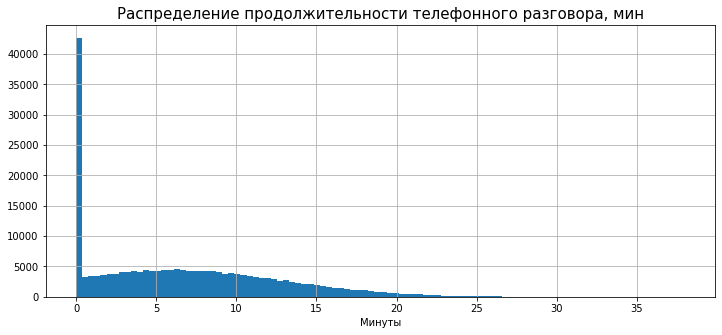

Рисунок 1. Гистограмма распределения продолжительности телефонного разговора


In [10]:
# визуализация распределения продолжительности телефонного разговора
plt.figure(figsize=(12, 5))
calls['duration'].hist(bins=100)
plt.title('Распределение продолжительности телефонного разговора, мин', fontsize=15)
plt.xlabel('Минуты')
plt.show()
print('Рисунок 1. Гистограмма распределения продолжительности телефонного разговора')

Итак, большинство телефонных разговоров имело продолжительность "нуль", что по условиям представленных на анализ данных следует трактовать, как пропущенный вызов.

Прочая продолжительность телефонного разговора группируется около отметки в в 7,5 минут близким к нормальному распределению со смещенеием вправо (левосторонний скос). Максиммальная продолжительность разговора находиться в близи отметки в 35 минут, что вполне соответсвует здравому смыслу.

Таким образом, аномальных значений продолжительности разгора не выявлено.

Исключим из данных пропущенные вызовы.

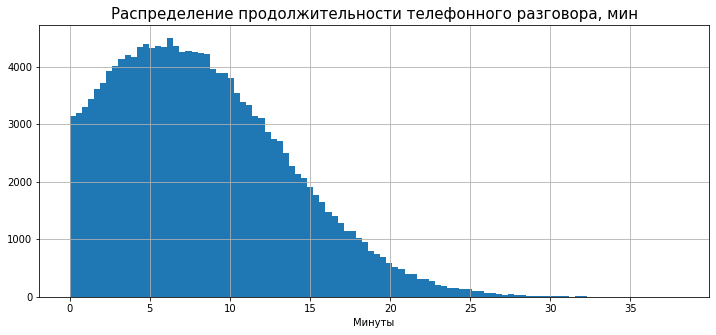

Рисунок 1. Гистограмма распределения продолжительности телефонного разговора


In [11]:
# исключение пропущенных вызовов из фрейма с данным по звонкам
calls = calls[calls['duration'] > 0]

# визуализация распределения продолжительности телефонного разговора
plt.figure(figsize=(12, 5))
calls['duration'].hist(bins=100)
plt.title('Распределение продолжительности телефонного разговора, мин', fontsize=15)
plt.xlabel('Минуты')
plt.show()
print('Рисунок 1. Гистограмма распределения продолжительности телефонного разговора')

Характер распределения после преобразований данных не изменился.

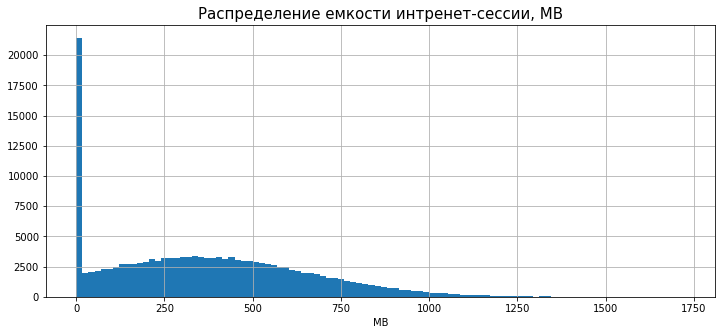

Рисунок 2. Гистограмма распределения емкости интренет-сессии


In [12]:
# визуализация распределения емкости интренет-сессии
plt.figure(figsize=(12, 5))
internet['mb_used'].hist(bins=100)
plt.title('Распределение емкости интренет-сессии, МВ', fontsize=15)
plt.xlabel('МВ')
plt.show()
print('Рисунок 2. Гистограмма распределения емкости интренет-сессии')

Итак, большинско интерне-сессиий имели "нулевую" емкость, что представлется возможным трактовать, как емксоть сессии менее 1 МВ, либо техничекая ошибка интренет-соединения.

Прочие интернет-сессии по показателю емкости распределены вокруг отметки 375 МВ близким к нормальному типу, несколько смещенным вправо (левосторонний скос) видом. Максимальная емкость интернет-сессии близка к отметки в 1750 МВ, что представавлеться вплоне реальным (длительные прослушивания музыки онлайн, просмотр видео онлайн).

Таким образом, аномалии в данных про продолжительности интернет-сессий не выявлены.

Исключим несостоявщиеся сессия из данных.

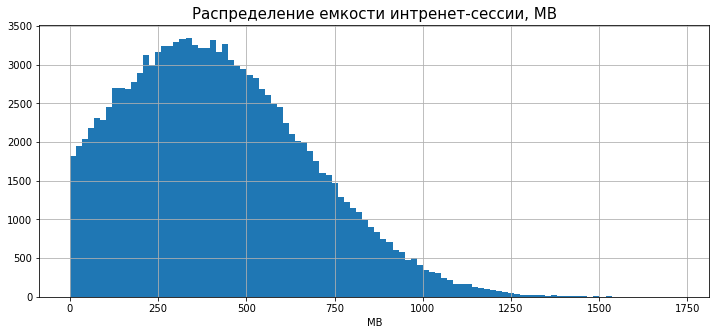

Рисунок 2. Гистограмма распределения емкости интренет-сессии


In [13]:
# исключение несостоявшихся сессий из фрейма с данными о траффике
internet = internet[internet['mb_used'] > 0]

# визуализация распределения емкости интренет-сессии
plt.figure(figsize=(12, 5))
internet['mb_used'].hist(bins=100)
plt.title('Распределение емкости интренет-сессии, МВ', fontsize=15)
plt.xlabel('МВ')
plt.show()
print('Рисунок 2. Гистограмма распределения емкости интренет-сессии')

Характер распределения после преобразований данных не изменился.

**Вывод**

1. Данные о времени звонков, сообщений, сессий приведены к типу данных datetime.
2. Данные о продолжительности разговора округлены до необходимых значений, согласно условиям тарифов.
3. Все представленные данные за единый временной интервал - 2018 год.
4. Необоснованные пропущенные значения, а также явные (полные) дубликаты отсутвуют.
5. Пропущенные вызовы и несостоявшиеся интернет-сессии исключены.

Данные подготовлены к дальнейшему анализу.

## Разведовательный анализ данных

### Количество сделанных звонков и израсходованных минут разговора по месяцам

,calls_number_per_month,calls_duratiion_per_month
month,,
1,1164,10206.44
2,2705,23145.58
3,5383,45433.85
4,7504,62530.92
5,10116,83770.77
6,11833,99249.71
7,14780,124373.23
8,17257,145071.63
9,19446,163723.16


Таблица 6. Количество звонков и суммарная продолжительность разговров в месяц


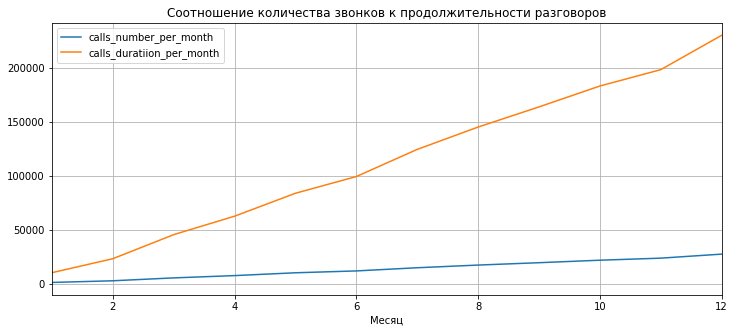

Рисунок 3. График помесячной динамики количества звонков и суммарной продолжительности разговоров


In [14]:
# выделение месяца звонка
calls['month'] = calls['call_date'].dt.month

# расчет количества звонков и израсходованных минут по месяцам
calls_month_period = (
    calls.groupby('month')
    .agg(
        calls_number_per_month = ('id', 'count'), 
        calls_duratiion_per_month = ('duration', 'sum')
    )
)

# отображение результатов расчетов
display(calls_month_period)
print('Таблица 6. Количество звонков и суммарная продолжительность разговров в месяц')

# визуализация расчетов
calls_month_period.plot(figsize=(12, 5), grid=True)
plt.title('Соотношение количества звонков к продолжительности разговоров')
plt.xlabel('Месяц')
plt.show()
print('Рисунок 3. График помесячной динамики количества звонков и суммарной продолжительности разговоров')

За анализируемый период количество звонков и продолжительность разговоров возрастают линейно на протяжении всего исследуемого отрезка времени, начиная с 1164 звонков в января и заканчивая 27385 звонками на пике в декабре; начиная с 10206 минут разговоров в январе и заканчивая 230010 минут разговоров в декабре.

При этом, растет и средняя продолжительность расзговора (растояние между графиками количества звонков и продолжительности разговоров увеличиваеться ближе к концу анализируемого периода, значит продолжительноть разговоров растет быстерее, чем количество звонков, кроме того, угол графика продолжительности разговоров больше угла наклона графика количства звонков, значит скороть события, описывемого график быстрее).

### Количество отправленных сообщений по месяцам

,messages_number_per_month
month,
1,924
2,1924
3,3648
4,5179
5,7298
6,8983
7,11320
8,13088
9,14759


Таблица 7. Количество отправленных сообщений помесячно


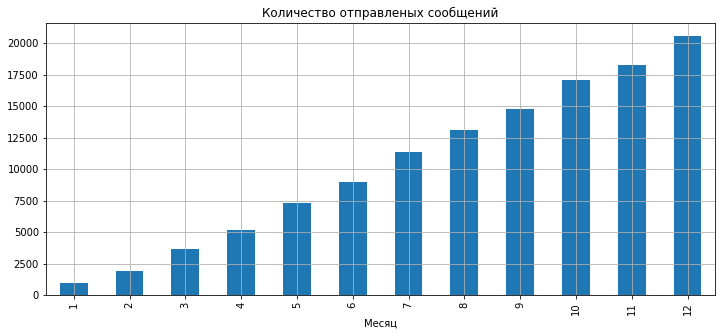

Рисунок 4. График динамики отправленных сообщений помесячно


In [15]:
# выделение месяца отправки сообщения
messages['month'] = messages['message_date'].dt.month

# расчет количества сообщений по месяцам
messages_month_period = (
    messages.groupby('month')
    .agg(
        messages_number_per_month=('id', 'count')
    )
)

# отображение результатов расчетов
display(messages_month_period)
print('Таблица 7. Количество отправленных сообщений помесячно')

# визуализация расчетов
messages_month_period.plot(figsize=(12, 5), grid=True, kind='bar', legend=False)
plt.title('Количество отправленых сообщений')
plt.xlabel('Месяц')
plt.show()
print('Рисунок 4. График динамики отправленных сообщений помесячно')

Аналогично статистки по звонкам, количество соообщений отправленых по месячно растет линейно на протяжении всего анализируемого периода, начиная с 924 сообщений в января, заканчивая пиком в 20555 сообщений в декабре.

### Объем израсходованного интернет-трафика по месяцам

,internet_traffic_mb,sessions_count
month,,
1,407732.53,966
2,955251.65,2263
3,1811835.61,4262
4,2433311.62,5692
5,3525862.24,8209
6,4180017.17,9656
7,5029478.75,11788
8,5998157.07,14009
9,6447422.36,15198


Таблица 8. Количество сессий и суммарный объем интернет-траффика (MB) помесячно


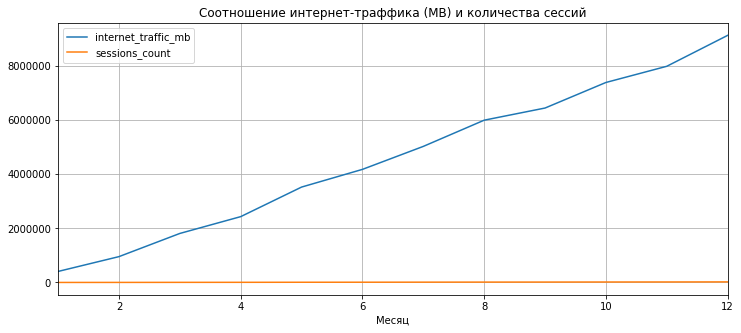

Рисунок 5. График динамики количества интернет-сессий и суммарный объем интернет-трафика (MB) помесячно


In [16]:
# выделение месяца интернет-соединения
internet['month'] = internet['session_date'].dt.month

# расчет количества MB траффика по месяцам
internet_month_period = (
    internet.groupby('month')
    .agg(
        internet_traffic_mb = ('mb_used', 'sum'),
        sessions_count = ('id', 'count')
    )
)

# отображение результатов расчетов
display(internet_month_period)
print('Таблица 8. Количество сессий и суммарный объем интернет-траффика (MB) помесячно')

# визуализация расчетов
internet_month_period.plot(figsize=(12, 5), grid=True)
plt.title('Соотношение интернет-траффика (MB) и количества сессий')
plt.xlabel('Месяц')
plt.show()
print('Рисунок 5. График динамики количества интернет-сессий и суммарный объем интернет-трафика (MB) помесячно')

И количество сессий и объем интернет траффика на протяжении всего анализируемого периода растут линенйно, начиная с 407732 МВ в январе, заканчивая 9133555 МВ на пике в декабре; начиная с 966 сессий в январе, заканчивая 24478 сессиями в декабре. 

При этом, возрастает и средняя продолжительность одной сессии (расстояние между графиками интернет-трафиика и количества сессий увеличивает, значит трафиик растет быстрее, чем число сессий).

### Помесячная выручку с каждого пользователя

Согласно заданию, выручка рассчитываеться, как произведение разницы бесплатного лимит и суммарного количества звонков, сообщений и интернет-трафика и значения из тарифного плана плюс абонентская плата, соответствующую тарифному плану.

Таким образом, для расчета помесячной выручки с каждого пользователя создадим фрейм, объединяющий данные на каждого пользователя по потраченным минутам разговора, отправленных сообщений и МВ трафика помесячно и условия применяемого тарифного плана каждым пользователем.

In [17]:
# стандартизация название колонок во фреймах
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

# создание фрейма для расчета помесячной выручки с каждого пользователя
month_revenue = (
     calls.groupby(['user_id', 'month']).agg(calls_duration_min_month = ('duration_min', 'sum'))
    .merge(messages.groupby(['user_id', 'month'])
           .agg(messages_count_per_month = ('id', 'count')), on=['user_id', 'month'], how='outer')
    .merge(internet.groupby(['user_id', 'month'])
           .agg(internet_traffic_mb_per_month = ('mb_used', 'sum')), on=['user_id', 'month'], how='outer')
    .reset_index()
    .merge(users[['user_id', 'city', 'tariff']], on='user_id', how='outer')
    .merge(tariffs, on='tariff')
    .fillna(0)
)

# приведение типа данных к соответсвующему описываемому признаку
month_revenue['month'] = month_revenue['month'].astype(int)

# отображение результата
display(month_revenue.sample(5))
print('Таблица 9. Расчетные данные для определения помесячной выручки оператора с каждого пользователя')

,user_id,month,calls_duration_min_month,messages_count_per_month,internet_traffic_mb_per_month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
445,1271,11,155.0,45.0,6976.25,Челябинск,ultra,1000,30720,3000,1950,150,1,1
2928,1433,11,503.0,83.0,13889.66,Подольск,smart,50,15360,500,550,200,3,3
2212,1266,12,558.0,47.0,13534.06,Калуга,smart,50,15360,500,550,200,3,3
3132,1482,3,444.0,63.0,13108.16,Санкт-Петербург,smart,50,15360,500,550,200,3,3
2548,1345,8,281.0,3.0,23642.17,Москва,smart,50,15360,500,550,200,3,3


Таблица 9. Расчетные данные для определения помесячной выручки оператора с каждого пользователя


,user_id,month,calls_duration_min_month,messages_count_per_month,internet_traffic_mb_per_month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue_per_month,messages_revenue_per_month,internet_revenue_per_month,total_revenue_per_month
2512,1337,7,111.0,8.0,15873.78,Вологда,smart,50,15360,500,550,200,3,3,0.0,0.0,200.0,750.0
1840,1183,10,421.0,31.0,11886.21,Владивосток,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
2484,1327,4,214.0,37.0,7723.24,Новороссийск,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
1134,1032,4,521.0,30.0,16845.64,Ульяновск,smart,50,15360,500,550,200,3,3,63.0,0.0,400.0,1013.0
3129,1481,11,297.0,19.0,19925.12,Москва,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0


Таблица 10. расчетная таблица. Помесячная выручка оператора с каждого пользователя


tariff,smart,ultra
month,,
0,550.000000,1950.000000
1,721.323529,1950.000000
2,827.603448,1975.000000
3,1164.623377,2014.864865
4,963.089286,2001.818182
5,1197.510638,2059.701493
6,1204.018293,2039.285714
7,1223.950249,2118.131868
8,1320.595745,2083.177570


Таблица 11. Помесячная выручка оператора с каждого пользователя


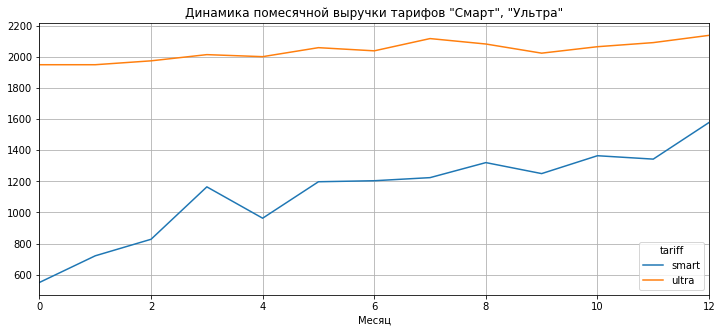

Рисунок 6. График динамики помесячной выручки тарифов "Смарт", "Ультра"


In [18]:
# расчет помесячной выручки за телефонные звонки с каждого пользователя
month_revenue['calls_revenue_per_month'] = (
    (month_revenue['calls_duration_min_month'] - month_revenue['minutes_included']) 
        * month_revenue['rub_per_minute']
)

month_revenue.loc[month_revenue['calls_revenue_per_month'] < 0, 'calls_revenue_per_month'] = 0

# расчет помесячной выручки за сообщения с каждого пользователя
month_revenue['messages_revenue_per_month'] = (
        (month_revenue['messages_count_per_month'] - month_revenue['messages_included'])
        * month_revenue['rub_per_message']
)

month_revenue.loc[month_revenue['messages_revenue_per_month'] < 0, 'messages_revenue_per_month'] = 0

# расчет помесячной выручки за интернет-траффки с каждого пользователя
month_revenue['internet_revenue_per_month'] = (
        np.ceil((month_revenue['internet_traffic_mb_per_month'] - month_revenue['mb_per_month_included']) / 1024.0) 
        * month_revenue['rub_per_gb']
)

month_revenue.loc[month_revenue['internet_revenue_per_month'] < 0, 'internet_revenue_per_month'] = 0

# расчет общей помесячной выручки с каждого пользователя
month_revenue['total_revenue_per_month'] = (
    month_revenue['calls_revenue_per_month'] + month_revenue['messages_revenue_per_month'] 
    + month_revenue['internet_revenue_per_month'] + month_revenue['rub_monthly_fee']
)

# отображение результата
display(month_revenue.sample(5))
print('Таблица 10. расчетная таблица. Помесячная выручка оператора с каждого пользователя')

# визуализация динамики средней помесячной выручки с пользователя
display(month_revenue
        .pivot_table(
            index='month', 
            columns='tariff', 
            values='total_revenue_per_month', 
            aggfunc='mean'
        )
       )
print('Таблица 11. Помесячная выручка оператора с каждого пользователя')

(
    month_revenue
        .pivot_table(
            index='month', 
            columns='tariff', 
            values='total_revenue_per_month', 
            aggfunc='mean'
        )
    .plot(figsize=(12, 5), grid=True)
)

plt.title('Динамика помесячной выручки тарифов "Смарт", "Ультра"')
plt.xlabel('Месяц')
plt.show()
print('Рисунок 6. График динамики помесячной выручки тарифов "Смарт", "Ультра"')
        


**Вывод**

Средняя помесячная выручка тарифа ultra с каждого абонента, начиная с марта 2018 года стабильно превышает отметку в 2000 рублей на протяжении всего исследуемого периода с провалом в апреле 2018 года в значение 2001 рублей и пиками в июле 2018 года и декабре 2018 года в значениях 2118 рублей и 2138 рублей. Что обуславливается стоимостью тарифного плана в 1965 рублей и выхода в сверхлимитные значения по звонкам, сообщениям и интернет-траффику пользователей тарифа, таким образом, формировая дополнительную выручка от использования тарифного плана.

Средняя помесячная выручка тарифа "Смарт" с каждого абонента стартует в январе 2018 года с отметки в 550 рублей и ростом в четыре пика в марте 2018 года (1164 рубля), июне 2018 года (1223 рублей), августе 2018 года (1320 рубля) и октябре 2018 года (1364 рубля) завершает рост отметкой 1578 рубля в декабре 2028 года. Стоимость пакета "Смарт" составлет 550 рублей, добавочная выручка образуеться за счет перерасхода лимитов по пакету услуг.

Далее проанализиуем поведение клиентов, с целью определения оптимальных параметров тарифов по количеству минут, сообщений и интренет-траффику.

## Анализ поведения клиентов в разрезе тарифов

### Звонки

#### Тарифный план smart

,user_id,month,min_per_month_smart,calls_cnt_smart,avg_min_per_month_smart
1171,1251,6,440.0,57,7.719298
2011,1454,10,432.0,50,8.640000
1423,1312,10,613.0,63,9.730159
2200,1496,3,557.0,67,8.313433
1370,1299,9,443.0,54,8.203704


Таблица 12. Количества звонков, использованных минут, средней продолжительности разговора 
пользователя тарифа smart в месяц


,summary
count,2221.000000
mean,8.901172
std,0.977322
min,2.000000
25%,8.351852
50%,8.911111
75%,9.441176
max,18.000000


Таблица 13. Статистики средней продолжительности разговора пользователя тарифа smart в месяц


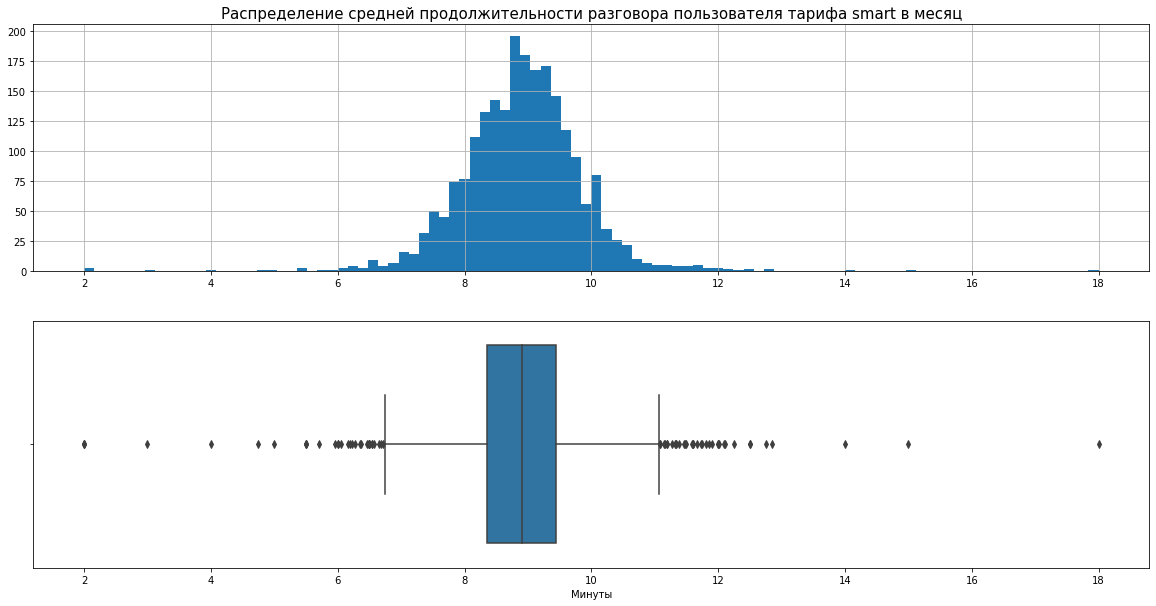

Рисунок 7. Гистограмма распределения средней продолжительности разговора пользователя тарифа smart в месяц


,summary
count,2221.000000
mean,47.116614
std,20.887092
min,1.000000
25%,32.000000
50%,48.000000
75%,61.000000
max,162.000000


Таблица 14. Статистики количества звонков пользователя тарифа smart в месяц


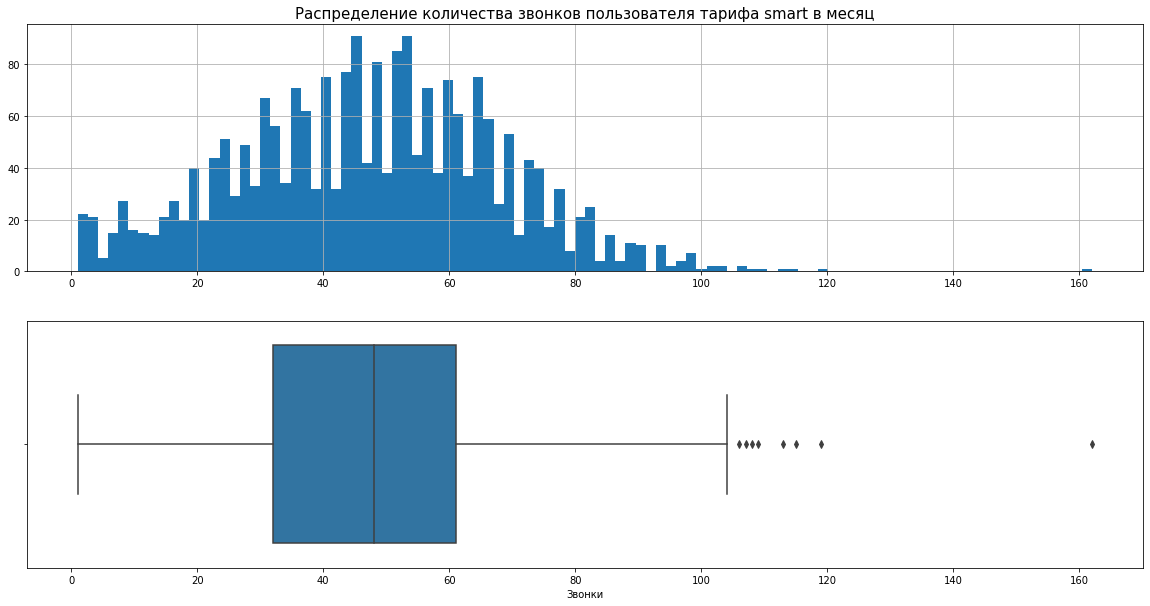

Рисунок 8. Гистограмма распределения количества звонков пользователя тарифа smart в месяц


,summary
count,2221.000000
mean,419.440342
std,188.992403
min,2.000000
25%,285.000000
50%,423.000000
75%,546.000000
max,1435.000000


Таблица 15. Статистики использованных минут пользователем тарифа smart в месяц


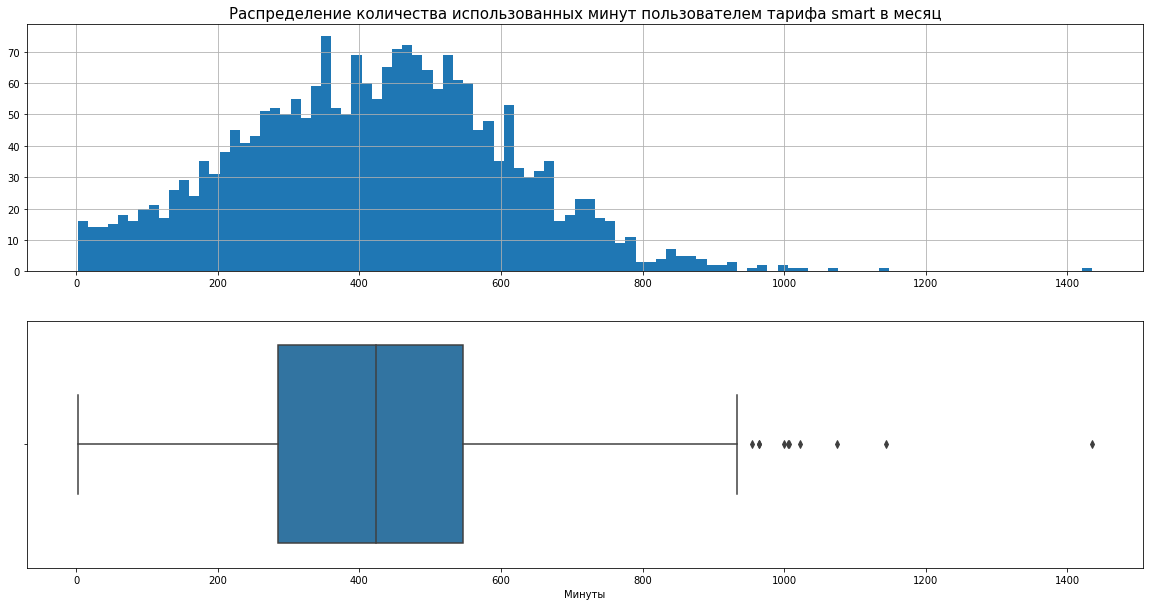

Рисунок 9. Гистограмма распределения количества использованных минут пользователем тарифа smart в месяц


In [19]:
# обогащение фрейма с данными по звонкам сведения об используемом тарифе
calls = calls.merge(users[['user_id', 'tariff']], on='user_id')

# расчет количества звонков, использованных минут, 
# средней продолжительности разговора пользователя тарифа smart в месяц
avg_min_per_month_smart =(
    calls[calls['tariff'] == 'smart']
    .groupby(['user_id', 'month'])
    .agg(
        min_per_month_smart = ('duration_min', 'sum'), 
        calls_cnt_smart = ('id', 'count')
 )
    .reset_index()
    .assign(avg_min_per_month_smart = lambda x: x['min_per_month_smart'] / x['calls_cnt_smart'])
)

# отображение расчетной таблицы звонков пользователей тарифа smart
display(avg_min_per_month_smart.sample(5))
print('''Таблица 12. Количества звонков, использованных минут, средней продолжительности разговора 
пользователя тарифа smart в месяц''')

# отображение статистик средней продолжительности разговора пользователя тарифа smart в месяц
display(
    avg_min_per_month_smart['avg_min_per_month_smart']
    .describe()
    .to_frame()
    .rename(columns={'avg_min_per_month_smart': 'summary'})
)
print('Таблица 13. Статистики средней продолжительности разговора пользователя тарифа smart в месяц')

# визуализация статистик средней продолжительности разговора пользователя тарифа smart в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
avg_min_per_month_smart['avg_min_per_month_smart'].hist(bins=100)
plt.title('Распределение средней продолжительности разговора пользователя тарифа smart в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_min_per_month_smart['avg_min_per_month_smart'])
plt.xlabel('Минуты')

plt.show()
print('Рисунок 7. Гистограмма распределения средней продолжительности разговора пользователя тарифа smart в месяц')

# отображение статистик количества звонков пользователя тарифа smart в месяц
display(
    avg_min_per_month_smart['calls_cnt_smart']
    .describe()
    .to_frame()
    .rename(columns={'calls_cnt_smart': 'summary'})
)
print('Таблица 14. Статистики количества звонков пользователя тарифа smart в месяц')

# визуализация статистик количества звонков пользователя тарифа smart в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
avg_min_per_month_smart['calls_cnt_smart'].hist(bins=100)
plt.title('Распределение количества звонков пользователя тарифа smart в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_min_per_month_smart['calls_cnt_smart'])
plt.xlabel('Звонки')

plt.show()
print('Рисунок 8. Гистограмма распределения количества звонков пользователя тарифа smart в месяц')

# отображение статистик использованных минут пользователем тарифа smart в месяц
display(
    avg_min_per_month_smart['min_per_month_smart']
    .describe()
    .to_frame()
    .rename(columns={'min_per_month_smart': 'summary'})
)
print('Таблица 15. Статистики использованных минут пользователем тарифа smart в месяц')

# визуализация статистик использованных минут пользователем тарифа smart в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
avg_min_per_month_smart['min_per_month_smart'].hist(bins=100)
plt.title('Распределение количества использованных минут пользователем тарифа smart в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_min_per_month_smart['min_per_month_smart'])
plt.xlabel('Минуты')

plt.show()
print('Рисунок 9. Гистограмма распределения количества использованных минут пользователем тарифа smart в месяц')

Представленные на исследование данные о телефонных соединениях пользователей тарифа smart позволяют оценить общую продолжительность телефонных разговоров в месяц, количество телефонных звонков в месяц и среднюю продолжительность одного разговора пользователя в месяц.

Так, исходя из 2221 наблюдения **средняя продолжительностью одного телефонного разговора пользователя тарифа smart в месяц** составляет 8,9 мин, при равной медиане в 8,9 мин, при этом скошенность распределения средней продолжительности разговора пользователя в месяц, как влево, так и вправо на гистограмме распределения не наблюдается. Единство арифметической средней и показателя положения - медианы объясняеться наличием как коротких двухминутных вызовов, так и компенсирующих их достачно продолжительных средних разговоров вплодь до 18 мин. При этом межквартильное расстояние равное 1 мин, позволяет признать разговоры длительноостью более 11 мин и менее 7 мин выбросами (значениями явно выбивающимися из общей выборке). 

Стандартное отклонение равно 1 мин, что при размахе выборке в 16 мин говорит о достаточно узком распределении данных. Так, порядка 95% наблюдений (референтное значение) располагаются в интревале от 7 мин до 11 мин. Распределение имеет близкое к нормальному вид.

**Среднее количество звонков пользователя тарифа smart в месяц** составляет 47 звонка, при медиане в 48 звонка и стандартном отклонении в 21 звонок. Размах выборки составляет 161 звонок, при минуме в 1 звонок и максимуме в 162 звонка. 

Межквартильный размах равен 29 звонкам, что предполагает выбросы при количестве звонков в месяц более 105. Практичесик все наблюдения выборки (99%) находятся в интервале от 1 до 111 звонков. В виду наличия восьми выбросов, распределение имеет некоторый правосторонних скос ("жирный хвост"), однако, в целом имеет вид близкий к нормальному распределение.

**Количество использованных минут пользователем тарифа smart в месяц** имеет среднее значение в 419 и медиану в 423. Таким образом, характеристика положения распределения определяет его некоторое смещение влево (правосторонних скос) относительности арифметической метрики мер центральной тенденции. Стандарное отклоние равное 189 мин при размахе выборке в 1433 мин свидетельствует о достаточно широком распределении.

Межквартильный размах равен 261 мин, значит выбросами возможно признать пользователей использующих более 938 мин в месяц. Референтное значение по выборке составляет от 47 до 799 мин использования для разговоров в месяц.

Распределение имеет близкое к нормальному вид.

#### Тарифный план ultra

,user_id,month,min_per_month_ultra,calls_cnt_ultra,avg_min_per_month_ultra
679,1375,11,980.0,111,8.828829
35,1019,6,386.0,43,8.976744
915,1471,8,866.0,89,9.730337
898,1466,10,647.0,68,9.514706
406,1254,3,504.0,56,9.000000


Таблица 16. Количества звонков, использованных минут, средней продолжительности разговора 
пользователя тарифа ultra в месяц


,summary
count,947.000000
mean,8.884253
std,1.095982
min,1.000000
25%,8.429339
50%,8.891892
75%,9.350243
max,17.500000


Таблица 17. Статистики средней продолжительности разговора пользователя тарифа ultra в месяц


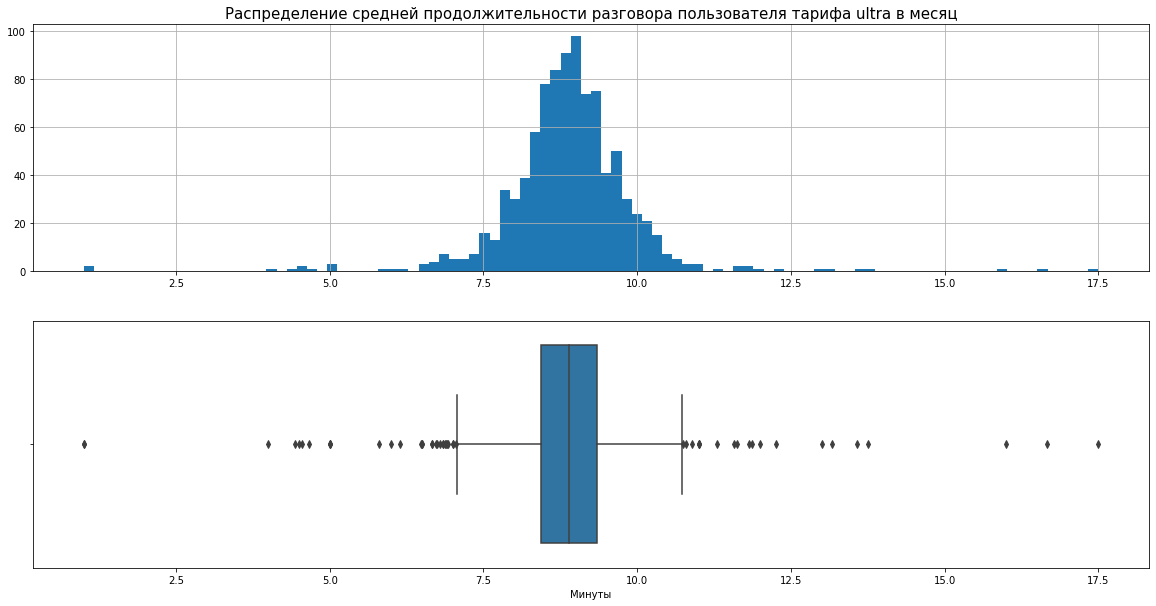

Рисунок 10. Гистограмма распределения средней продолжительности разговора пользователя тарифа ultra в месяц


,summary
count,947.000000
mean,61.613516
std,34.189197
min,1.000000
25%,35.000000
50%,61.000000
75%,84.000000
max,190.000000


Таблица 18. Статистики количества звонков пользователя тарифа ultra в месяц


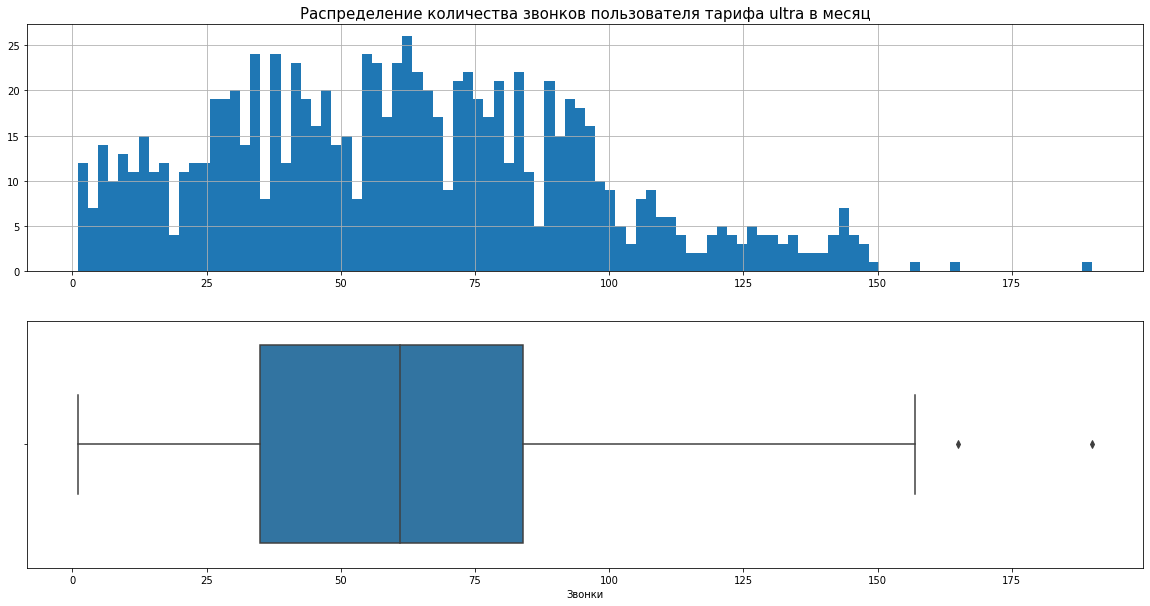

Рисунок 11. Гистограмма распределения количества звонков пользователя тарифа ultra в месяц


,summary
count,947.000000
mean,547.755016
std,305.513385
min,1.000000
25%,311.000000
50%,529.000000
75%,758.000000
max,1673.000000


Таблица 19. Статистики использованных минут пользователем тарифа ultra в месяц


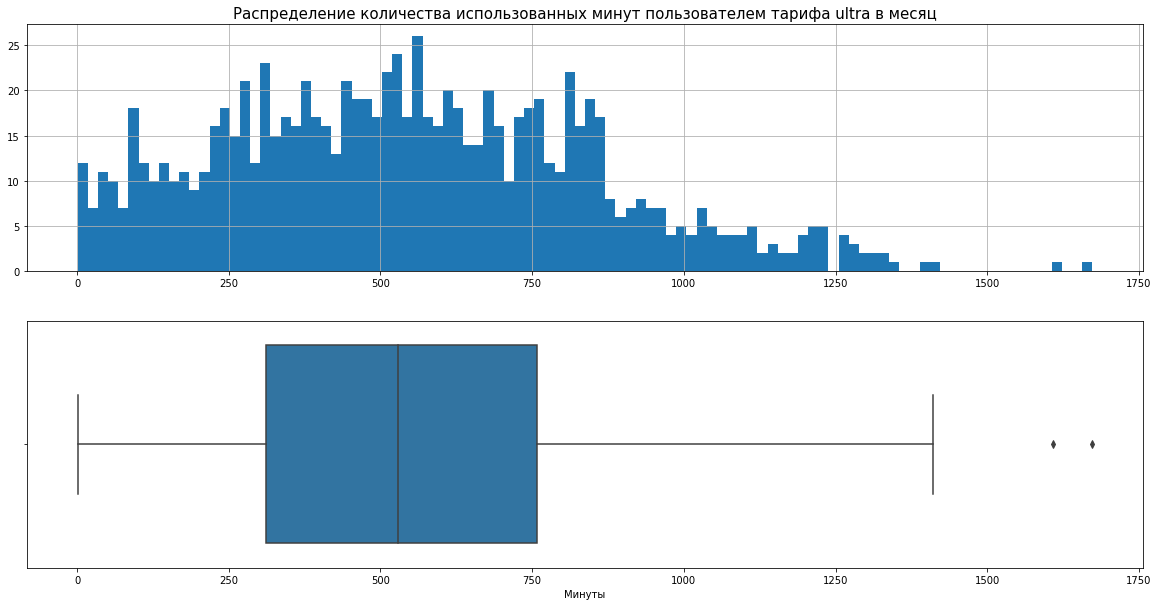

Рисунок 12. Гистограмма распределения количества использованных минут пользователем тарифа ultra в месяц


In [20]:
# расчет количества звонков, использованных минут, 
# средней продолжительности разговора пользователя тарифа ultra в месяц
avg_min_per_month_ultra =(
    calls[calls['tariff'] == 'ultra']
    .groupby(['user_id', 'month'])
    .agg(
        min_per_month_ultra = ('duration_min', 'sum'), 
        calls_cnt_ultra = ('id', 'count')
 )
    .reset_index()
    .assign(avg_min_per_month_ultra = lambda x: x['min_per_month_ultra'] / x['calls_cnt_ultra'])
)

# отображение расчетной таблицы звонков пользователей тарифа ultra
display(avg_min_per_month_ultra.sample(5))
print('''Таблица 16. Количества звонков, использованных минут, средней продолжительности разговора 
пользователя тарифа ultra в месяц''')

# отображение статистик средней продолжительности разговора пользователя тарифа ultra в месяц
display(
    avg_min_per_month_ultra['avg_min_per_month_ultra']
    .describe()
    .to_frame()
    .rename(columns={'avg_min_per_month_ultra': 'summary'})
)
print('Таблица 17. Статистики средней продолжительности разговора пользователя тарифа ultra в месяц')

# визуализация статистик средней продолжительности разговора пользователя тарифа ultra в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
avg_min_per_month_ultra['avg_min_per_month_ultra'].hist(bins=100)
plt.title('Распределение средней продолжительности разговора пользователя тарифа ultra в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_min_per_month_ultra['avg_min_per_month_ultra'])
plt.xlabel('Минуты')

plt.show()
print('Рисунок 10. Гистограмма распределения средней продолжительности разговора пользователя тарифа ultra в месяц')

# отображение статистик количества звонков пользователя тарифа ultra в месяц
display(
    avg_min_per_month_ultra['calls_cnt_ultra']
    .describe()
    .to_frame()
    .rename(columns={'calls_cnt_ultra': 'summary'})
)
print('Таблица 18. Статистики количества звонков пользователя тарифа ultra в месяц')

# визуализация статистик количества звонков пользователя тарифа ultra в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
avg_min_per_month_ultra['calls_cnt_ultra'].hist(bins=100)
plt.title('Распределение количества звонков пользователя тарифа ultra в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_min_per_month_ultra['calls_cnt_ultra'])
plt.xlabel('Звонки')

plt.show()
print('Рисунок 11. Гистограмма распределения количества звонков пользователя тарифа ultra в месяц')

# отображение статистик использованных минут пользователем тарифа ultra в месяц
display(
    avg_min_per_month_ultra['min_per_month_ultra']
    .describe()
    .to_frame()
    .rename(columns={'min_per_month_ultra': 'summary'})
)
print('Таблица 19. Статистики использованных минут пользователем тарифа ultra в месяц')

# визуализация статистик использованных минут пользователем тарифа ultra в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
avg_min_per_month_ultra['min_per_month_ultra'].hist(bins=100)
plt.title('Распределение количества использованных минут пользователем тарифа ultra в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_min_per_month_ultra['min_per_month_ultra'])
plt.xlabel('Минуты')

plt.show()
print('Рисунок 12. Гистограмма распределения количества использованных минут пользователем тарифа ultra в месяц')

Оценка телефонных разговоров пользователей тарифа ultra основа на 947 наблюдениях.

Так, **средняя продолжительность телефонного разговора пользователя тарифа ultra в месяц** составляет 8,8 мин, равная медиане в 8,8 мин, что при стандартном отклонении в 1 мин говорит о достаточно крутом графике распределения. Данные о продолжительности телефонного разговора пользователя тарифа ultra распределены достаточно узко. 99% процентов всех наблюдений находятся на интревале от 6 до 12 мин.

Размах выборке при минуме в 1 мин и максимуме в 17,5 мин составляет 16,5 мин. Межквартильный размах равен порядка 1 мин, что предполагает возможное признание выбросами значения превышающие 11 мин и меньше 7 мин.

Распределение достаточно симметрично, унимодально. Близко к нормальному.

**Среднее количетво телефонных звонков пользователя тарифа ultra в месяц** равно 62 звонкам, при схожей медиане в 61 звонок. Однако, в виду стандратного отклонения равного 34 звонкам, размаха выборки в 189 звонка и межкартильного размаха в 49 звонков, распределение носит достаточно пологий, широкий характер. И имеет всего два выброса: количество телефонных соединений более 158 за месяц. Кроме того, на интервалах от 25 до 50 звонков, от 50 до 75 звонков и от 75 до 100 звонков имеет несколько мод.

Распределение скошено вправо, большая часть значений выборки тяготеет к меньшим значениям.

**В среденем пользователи тарифа ultra в месяц** тратят 547 мин на телефонные разговоры, с несколько меньшей медианой в 529 мин. При этом распределение количество использованных минут хоть и тяготеет к нормальному, однако достаточно широкое с размахом от минимального в 1 минуту до максимальных значений в 1673 минуты (два пользователя более суток проводят в телефонных разговорах) и стандартном отклонении в 305 минут, что предполагает рефертное значение от 1 до 1157 минут.

### Сообщения

#### Тарифный план smart

,user_id,month,messages_per_month_smart
54,1012,8,23
376,1088,8,49
1248,1321,9,20
44,1011,8,15
1121,1286,11,12


Таблица 20. Количество сообщений, отправленных пользователем тарифа smart в месяц


,summary
count,1922.000000
mean,38.716441
std,26.787949
min,1.000000
25%,17.000000
50%,34.000000
75%,55.000000
max,143.000000


Таблица 21. Статистики количества сообщений, отправленных пользователем тарифа smart в месяц


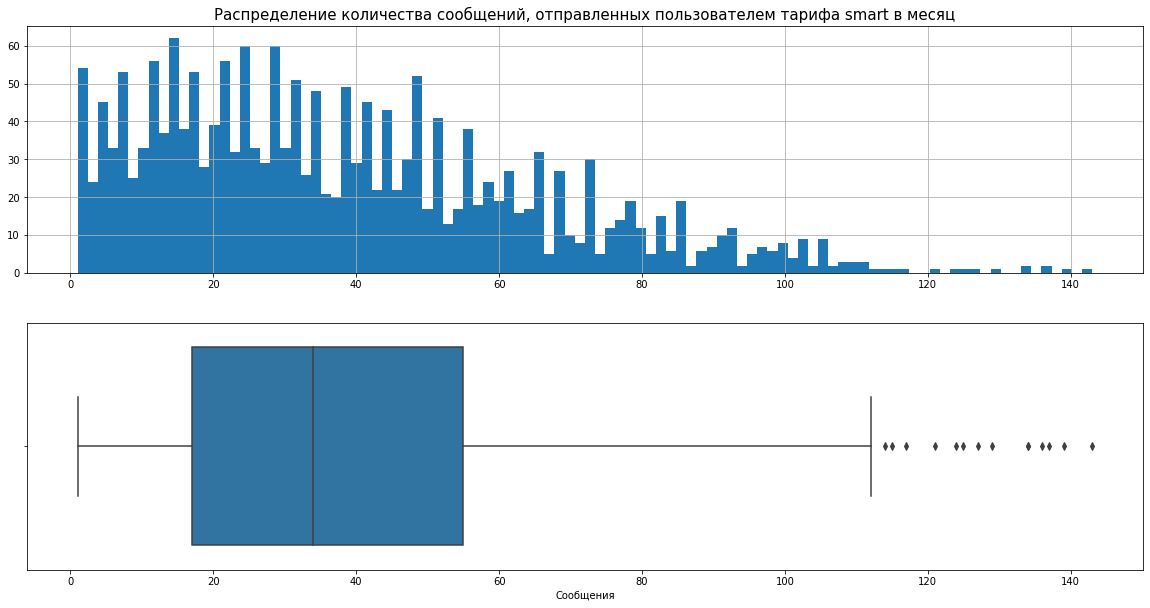

Рисунок 13. Гистограмма распределения количества сообщений, отправленных пользователем тарифа smart в месяц


In [21]:
# обогащение фрейма с данными по сообщениям сведения об используемом тарифе
messages = messages.merge(users[['user_id', 'tariff']], on='user_id')

# расчет количества сообщений, отправленных пользователем тарифа smart в месяц
messages_per_month_smart =(
    messages[messages['tariff'] == 'smart']
    .groupby(['user_id', 'month'])
    .agg(
        messages_per_month_smart = ('id', 'count')
    )
    .reset_index()
                          )

# отображение расчетной таблицы колиечтва сообщений пользователя тарифа smart
display(messages_per_month_smart.sample(5))
print('Таблица 20. Количество сообщений, отправленных пользователем тарифа smart в месяц')

# отображение статистик количества сообщений, отправленных пользователем тарифа smart в месяц 
display(
    messages_per_month_smart['messages_per_month_smart']
    .describe()
    .to_frame()
    .rename(columns={'messages_per_month_smart': 'summary'})
)
print('Таблица 21. Статистики количества сообщений, отправленных пользователем тарифа smart в месяц')

# визуализация статистик количества сообщений, отправленных пользователем тарифа smart в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
messages_per_month_smart['messages_per_month_smart'].hist(bins=100)
plt.title('Распределение количества сообщений, отправленных пользователем тарифа smart в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(messages_per_month_smart['messages_per_month_smart'])
plt.xlabel('Сообщения')

plt.show()
print('Рисунок 13. Гистограмма распределения количества сообщений, отправленных пользователем тарифа smart в месяц')

1922 набледния за поведением пользователей тарифа smart, позволяют оценить статистики отправки сообщений.

Так, **количество сообщений, отправленных пользователем тарифа smart в месяц** имеет среднее значение равное 39 и медиану равную 34. Таким образом, распределение смещено влево (имеет правосторонний скос).

Стандратное отклоние равно 27 сообщениям, размах выборки 142 сообщения от минимального значения в одно сообщение в месяц до максимального 143 сообщения в месяц. Таким образом, распределение имеет относительно широкий, пологий вид; 99% всех значений выборки находиться на интервале от одного до 119 сообщений на пользователя в месяц.

Первый квартиль равен 17 сообщениям, третий - 5 сообщениям. Таким образом, 25% пользоватлей отправлют в месяц до 17 сообщений, 75% - до 55 сообщений. Межквартильный размаз равен 38 сообщениям, значит число сообщений в месяц на одного пользователя, превышающее значение в 112 сообщений возможно признать выбросами.

Распределение имеет вид схожий с распределением Пуассона, биномальным распределением.

#### Тарифный план ultra

,user_id,month,messages_per_month_ultra
444,1330,12,69
87,1081,4,28
461,1335,9,77
432,1328,11,8
438,1330,6,78


Таблица 22. Количество сообщений, отправленных пользователем тарифа ultra в месяц


,summary
count,795.000000
mean,61.161006
std,45.931026
min,1.000000
25%,24.000000
50%,51.000000
75%,87.500000
max,224.000000


Таблица 23. Статистики количества сообщений, отправленных пользователем тарифа ultra в месяц


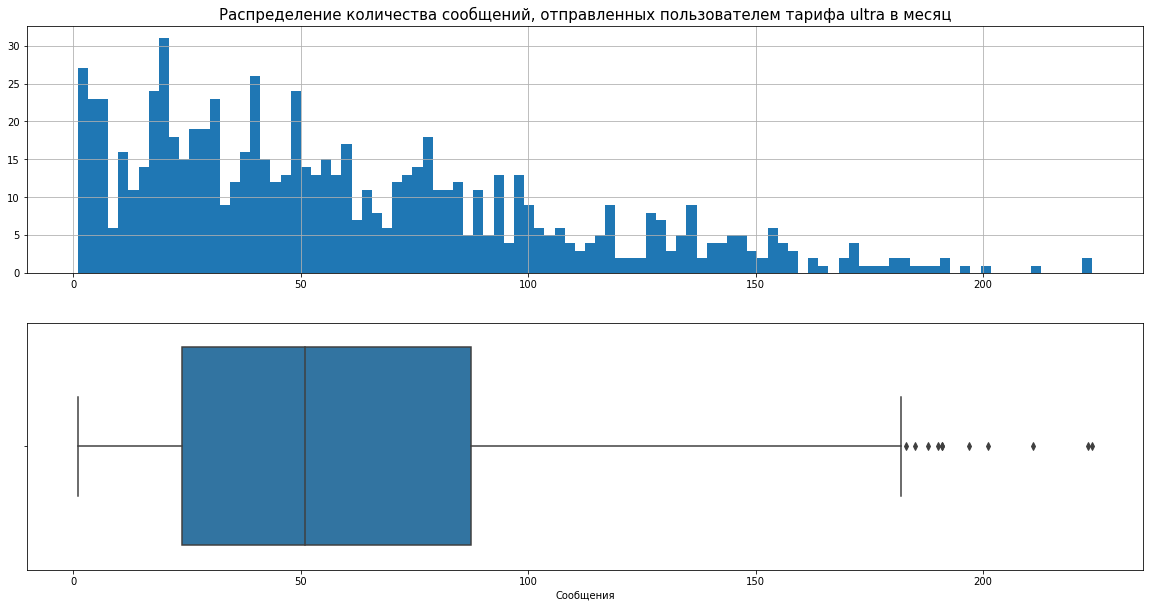

Рисунок 14. Гистограмма распределения количества сообщений, отправленных пользователем тарифа ultra в месяц


In [22]:
# расчет количества сообщений, отправленных пользователем тарифа ultra в месяц
messages_per_month_ultra =(
    messages[messages['tariff'] == 'ultra']
    .groupby(['user_id', 'month'])
    .agg(
        messages_per_month_ultra = ('id', 'count')
    )
    .reset_index()
                          )

# отображение расчетной таблицы колиечтва сообщений пользователя тарифа ultra
display(messages_per_month_ultra.sample(5))
print('Таблица 22. Количество сообщений, отправленных пользователем тарифа ultra в месяц')

# отображение статистик количества сообщений, отправленных пользователем тарифа ultra в месяц 
display(
    messages_per_month_ultra['messages_per_month_ultra']
    .describe()
    .to_frame()
    .rename(columns={'messages_per_month_ultra': 'summary'})
)
print('Таблица 23. Статистики количества сообщений, отправленных пользователем тарифа ultra в месяц')

# визуализация статистик количества сообщений, отправленных пользователем тарифа ultra в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
messages_per_month_ultra['messages_per_month_ultra'].hist(bins=100)
plt.title('Распределение количества сообщений, отправленных пользователем тарифа ultra в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(messages_per_month_ultra['messages_per_month_ultra'])
plt.xlabel('Сообщения')

plt.show()
print('Рисунок 14. Гистограмма распределения количества сообщений, отправленных пользователем тарифа ultra в месяц')

**Пользователь тарифного плана ultra в среднем отправлет** 62 сообщения в месяц, при медианном показателе равном 51 сообщенияю. Стандартное отклонение в 46 сообщений, наравне с неравенством мер центральной тенденции позволяет сделать вывод о широком, смещенном влево (правосторонний скос) распределении.

Так, размах распределения 223 сообщения, межквартильный размах 64 ссобщения. Кроме того, в выборке имеються выбросы, пользователи отправляющие более 184 сообщений.

### Интернет-траффик

«Мегалайн» всегда округляет мегабайты — до гигабайт.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Реализуем поставленное условие функцией.

In [23]:
# функция принимает в качестве аргумента значения трафика в MB и возращает значение траффика в GB
# согласно условиям тарфиного плана
def convert_traffic(mb_used):
    return int(np.ceil(mb_used / 1024.0))

Для учета условий тарифа, функцию конвертации трафика будем применять к агрегированным по месячному периоду данным.

#### Тарифный план smart

,user_id,month,mb_per_month_smart,session_cnt_per_month_smart,gb_per_month_smart,avg_mb_per_session_per_month_smart
159,1033,9,25858.97,69,26,374.767681
1967,1439,10,16983.50,44,17,385.988636
365,1075,11,18239.34,50,18,364.786800
1391,1305,11,24529.88,59,24,415.760678
874,1187,10,19913.36,49,20,406.395102


Таблица 25. Количество сессий, интернет-трафика, 
среднего количества МВ на одну сессию пользователя тарифа smart в месяц


,summary
count,2227.000000
mean,386.158052
std,42.940972
min,185.030000
25%,360.666056
50%,384.329808
75%,410.161147
max,766.220000


Таблица 26. Статистики средней емкости интернет-сессии пользователя тарифа smart в месяц, МВ


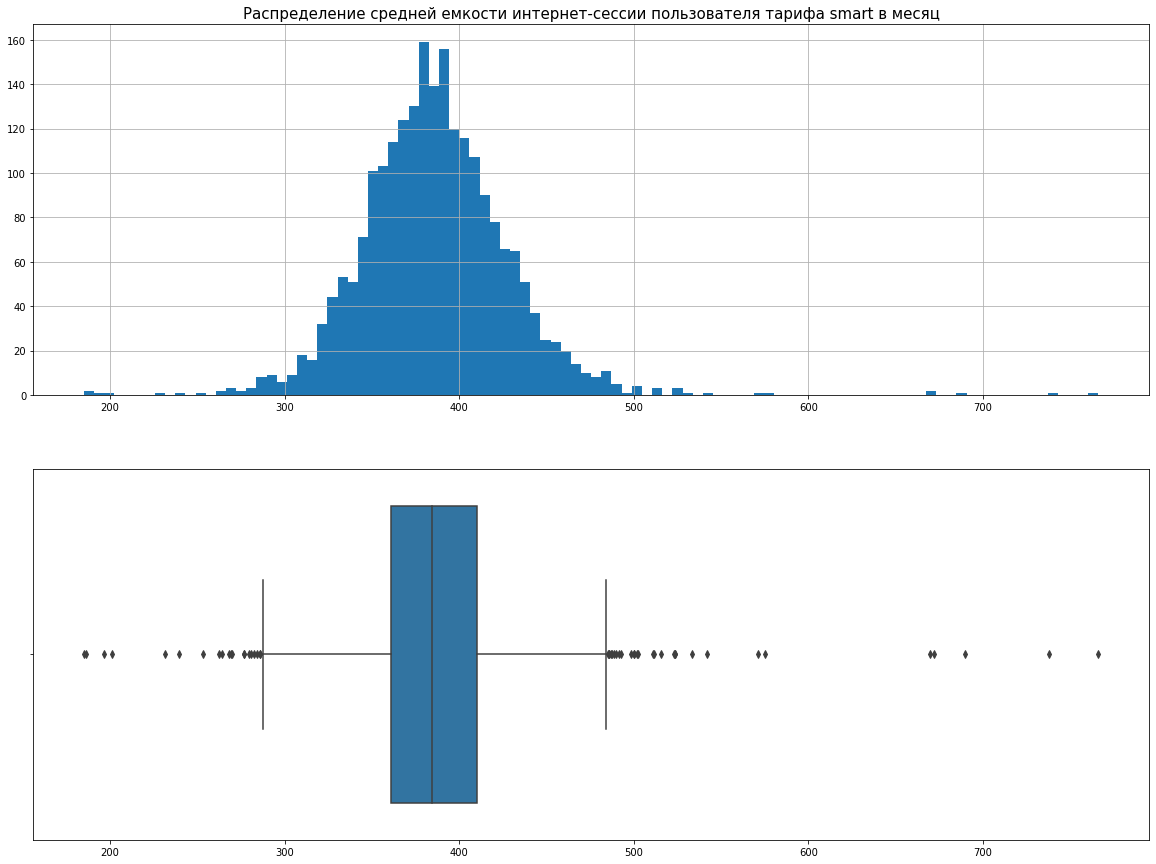

Рисунок 15. Гистограмма распределения средней емкости интернет-сессии пользователя тарифа smart в месяц


,summary
count,2227.000000
mean,42.081724
std,14.760428
min,1.000000
25%,34.000000
50%,43.000000
75%,51.000000
max,101.000000


Таблица 27. Статистики количества интернет-сессий пользователя тарифа smart в месяц


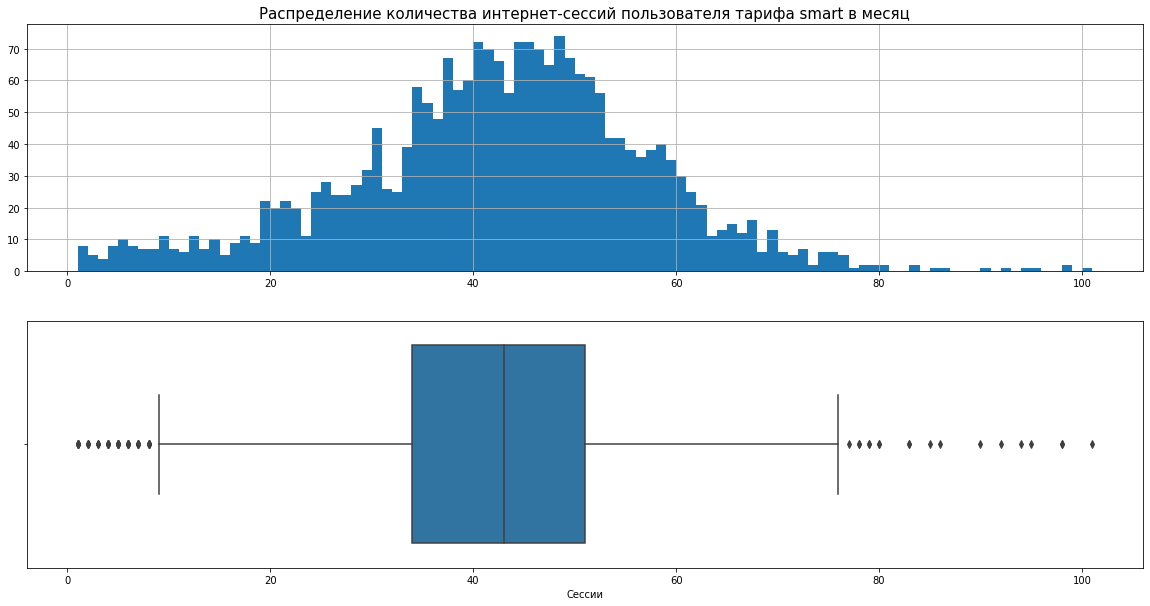

Рисунок 16. Гистограмма распределения количества интернет-сессий пользователя тарифа smart в месяц


,summary
count,2227.000000
mean,16.343511
std,5.728752
min,1.000000
25%,13.000000
50%,17.000000
75%,20.000000
max,38.000000


Таблица 28. Статистики интернет-траффика пользователя тарифа smart в месяц, GB


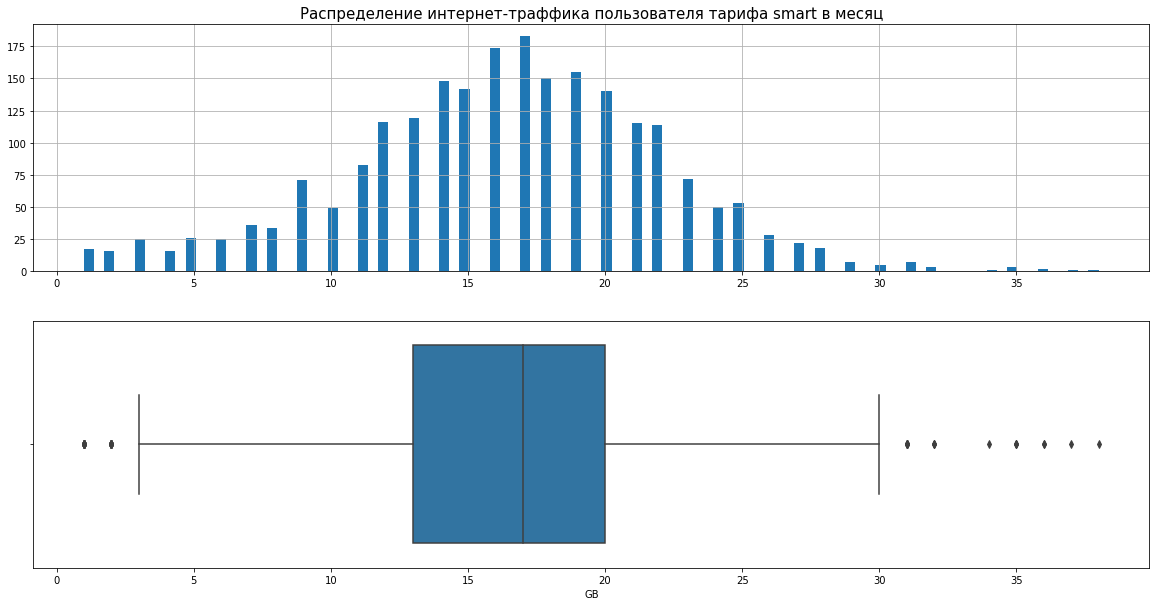

Рисунок 17. Гистограмма распределения интернет-траффика пользователя тарифа smart в месяц


In [24]:
# обогащение фрейма с данными по траффику сведениями об используемом тарифе
internet = internet.merge(users[['user_id', 'tariff']], on='user_id')

# расчет количества сессий, интернет-трафика, 
# среднего количества МВ на одну сессию пользователя тарифа smart в месяц, 
# конвертация интернет-траффика из МВ в GB
avg_mb_per_month_smart =(
    internet[internet['tariff'] == 'smart']
    .groupby(['user_id', 'month'])
    .agg(
        mb_per_month_smart = ('mb_used', 'sum'),
        session_cnt_per_month_smart = ('id', 'count')
    )
    .reset_index()
    .assign(
        gb_per_month_smart = lambda x: x['mb_per_month_smart'].apply(convert_traffic),
        avg_mb_per_session_per_month_smart = lambda x: x['mb_per_month_smart'] / x['session_cnt_per_month_smart']
    )
)

# отображение расчетной таблица траффика тарифа smart
display(avg_mb_per_month_smart.sample(5))
print('''Таблица 25. Количество сессий, интернет-трафика, 
среднего количества МВ на одну сессию пользователя тарифа smart в месяц''')

# отображение статистик средней емкости интернет-сессии пользователя тарифа smart в месяц
display(
    avg_mb_per_month_smart['avg_mb_per_session_per_month_smart']
    .describe()
    .to_frame()
    .rename(columns={'avg_mb_per_session_per_month_smart': 'summary'})
)
print('Таблица 26. Статистики средней емкости интернет-сессии пользователя тарифа smart в месяц, МВ')

# визуализация статистик средней емкости интернет-сессии пользователя тарифа smart в месяц
plt.figure(figsize=(20, 15))

plt.subplot(2, 1, 1)
avg_mb_per_month_smart['avg_mb_per_session_per_month_smart'].hist(bins=100)
plt.title('Распределение средней емкости интернет-сессии пользователя тарифа smart в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_mb_per_month_smart['avg_mb_per_session_per_month_smart'])
plt.xlabel('')

plt.show()
print('Рисунок 15. Гистограмма распределения средней емкости интернет-сессии пользователя тарифа smart в месяц')

# отображение статистик количества интернет-сессий пользователя тарифа smart в месяц
display(
    avg_mb_per_month_smart['session_cnt_per_month_smart']
    .describe()
    .to_frame()
    .rename(columns={'session_cnt_per_month_smart': 'summary'})
)
print('Таблица 27. Статистики количества интернет-сессий пользователя тарифа smart в месяц')

# визуализация статистик количества интернет-сессий пользователя тарифа smart в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
avg_mb_per_month_smart['session_cnt_per_month_smart'].hist(bins=100)
plt.title('Распределение количества интернет-сессий пользователя тарифа smart в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_mb_per_month_smart['session_cnt_per_month_smart'])
plt.xlabel('Сессии')

plt.show()
print('Рисунок 16. Гистограмма распределения количества интернет-сессий пользователя тарифа smart в месяц')

# отображение статистик интернет-траффика пользователя тарифа smart в месяц
display(
    avg_mb_per_month_smart['gb_per_month_smart']
    .describe()
    .to_frame()
    .rename(columns={'gb_per_month_smart': 'summary'})
)
print('Таблица 28. Статистики интернет-траффика пользователя тарифа smart в месяц, GB')

# визуализация статистик интернет-траффика пользователя тарифа smart в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
avg_mb_per_month_smart['gb_per_month_smart'].hist(bins=100)
plt.title('Распределение интернет-траффика пользователя тарифа smart в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_mb_per_month_smart['gb_per_month_smart'])
plt.xlabel('GВ')

plt.show()
print('Рисунок 17. Гистограмма распределения интернет-траффика пользователя тарифа smart в месяц')

Поведение пользователя по направлению интернет-трафиика характеризуется, как минимум тремя доступными, исходя из имеющися данных, метриками: общий используемый месячный трафик пользователем, количество совершенных сессий в месяц и средняя емкость одной интернет-сессии в месяц на одного пользователя. Далее рассмотрим каждый из имеющися в распоряжении расчетных показателей в разрезе тарифов.

2227 наблюдения позволяют сформировать представление о пользователях тарифа smart в разрезе пользования услогами траффика.

Так, **средняя емкость интернет-сессии пользователя тарифа smart в месяц** характеризуется слдующими мерами центральной тенденции: средним значением в 386 МВ, медианой в 384 МВ, стандартным отклонением в 43 МВ свидетельствует о достаточно узком, симметричном распределении. Однако, размах выборке от минимума в 185 МВ до максимум в 766 МВ и несопоставими узком межквартильном размахе от первого квартиля в 360 МВ и третьего квартиля в 410 МВ свидетельствует о наличии значительного числа выбросов: значения превышающие 485 МВ и значения меньше 285 МВ на одну сессию. При этом, участок в три сигмы покрывает значения от 257 МВ до 515 МВ.

Распределение **количества интернет-сессий пользователя тарифа smart в месяц** имеет вид близкий к нормальному, широкой, пологой формы со средним значением в 42 сессий, медианой в 43 сессиий, стандартным отклонением в 15 сессий, минимумов в 1 сессию и максимум в 101 сессию. 25% пользователей произвели до 34 сессий за месяц, половина пользоватлей - до 43 сессий, 75% - до 51 сессии, 99% выборки заключено в интервал от одной до 87 сессии, а выбросами можно признать количество сессий менее восьми и более в 96 сессий в месяц.

Суммарный **интернет-траффик пользователя тарифа smart в месяц** распределен нормальным образом со средним значением в 16,34 GВ, медианой равной 17 GВ и стандарным отклонием в 5,72 GВ. 

Размах выборки равен 37 GВ, распределение широкое, пологое.

99% всех наблюдений находиться в интревали от 0 МВ до 33,50 GВ, выбросы выборки находятся за пределами менее 2,5 GВ и более 30,5 GB.

#### Тарифный план ultra

,user_id,month,mb_per_month_ultra,session_cnt_per_month_ultra,gb_per_month_ultra,avg_mb_per_session_per_month_ultra
419,1243,12,30550.26,56,30,545.540357
161,1094,8,21323.07,43,21,495.885349
74,1049,10,3345.75,11,4,304.159091
287,1166,10,13679.07,28,14,488.538214
721,1380,7,37962.28,66,38,575.186061


Таблица 29. Количество сессий, интернет-трафика, 
среднего количества МВ на одну сессию пользователя тарифа ultra в месяц


,summary
count,974.000000
mean,530.959384
std,56.636880
min,240.801667
25%,498.070746
50%,531.748072
75%,565.418867
max,730.872500


Таблица 30. Статистики средней емкости интернет-сессии пользователя тарифа ultra в месяц, МВ


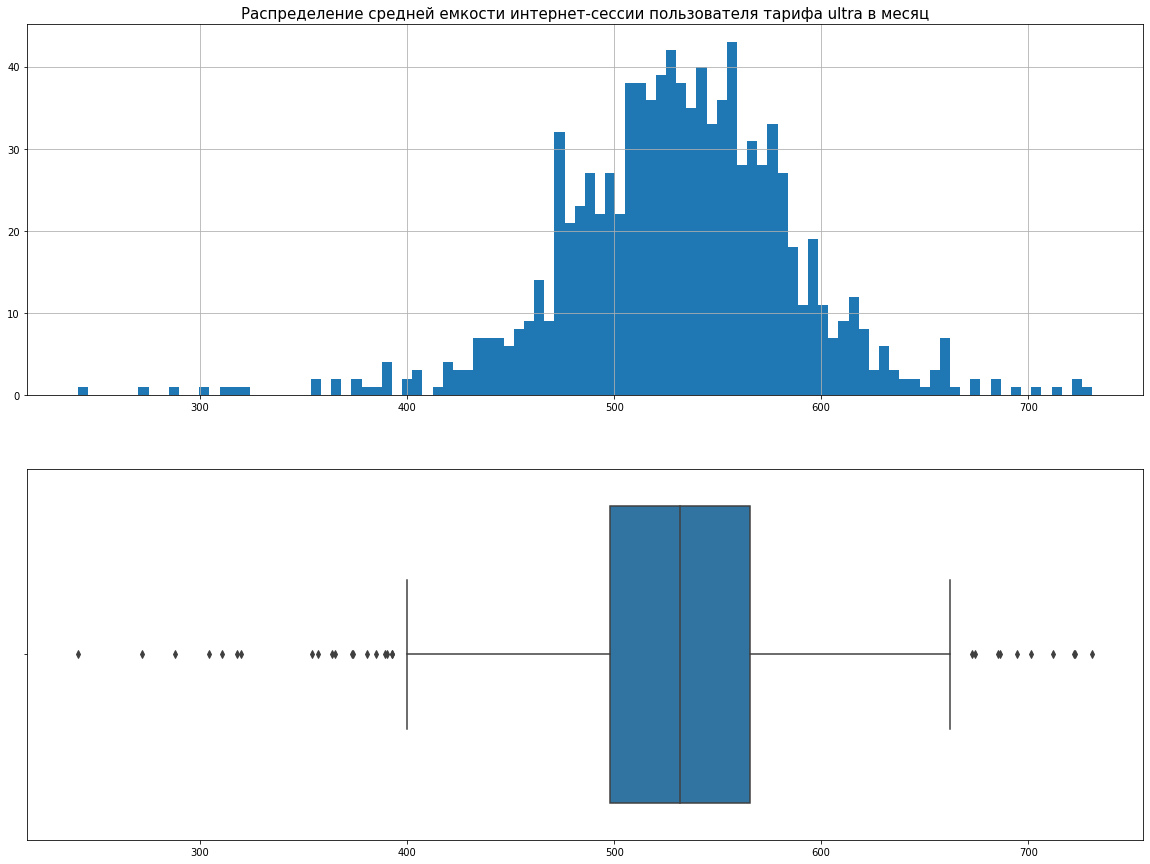

Рисунок 18. Гистограмма распределения средней емкости интернет-сессии пользователя тарифа ultra в месяц


,summary
count,974.000000
mean,37.045175
std,18.473336
min,1.000000
25%,23.000000
50%,36.500000
75%,50.000000
max,94.000000


Таблица 31. Статистики количества интернет-сессий пользователя тарифа ultra в месяц


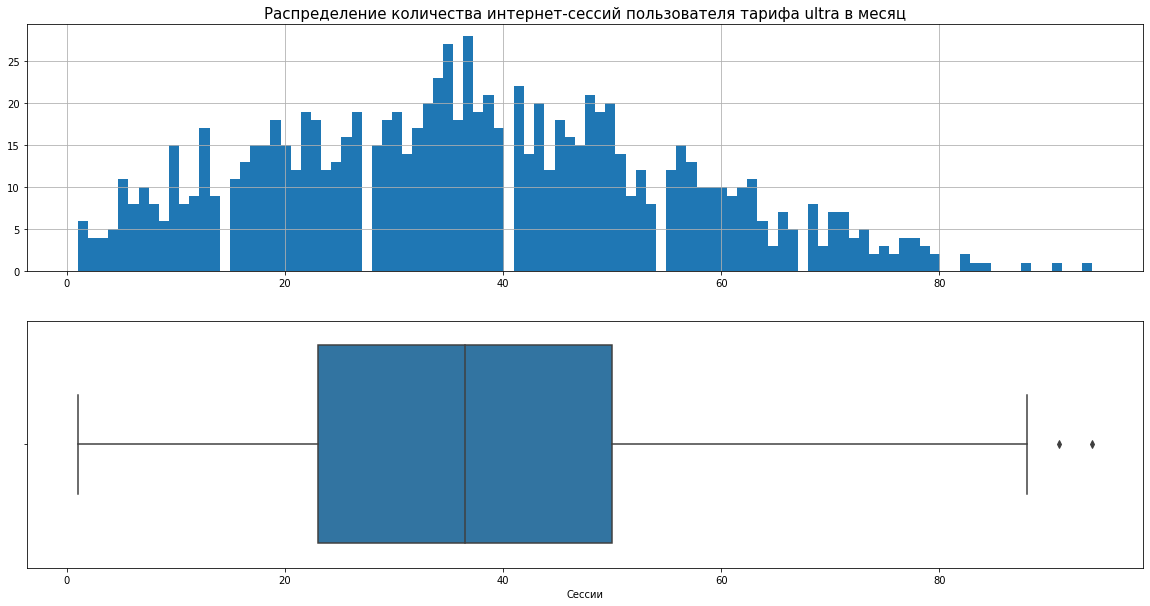

Рисунок 19. Гистограмма распределения количества интернет-сессий пользователя тарифа ultra в месяц


,summary
count,974.000000
mean,19.714579
std,9.687335
min,1.000000
25%,12.000000
50%,19.000000
75%,27.000000
max,49.000000


Таблица 32. Статистики интернет-траффика пользователя тарифа ultra в месяц, GB


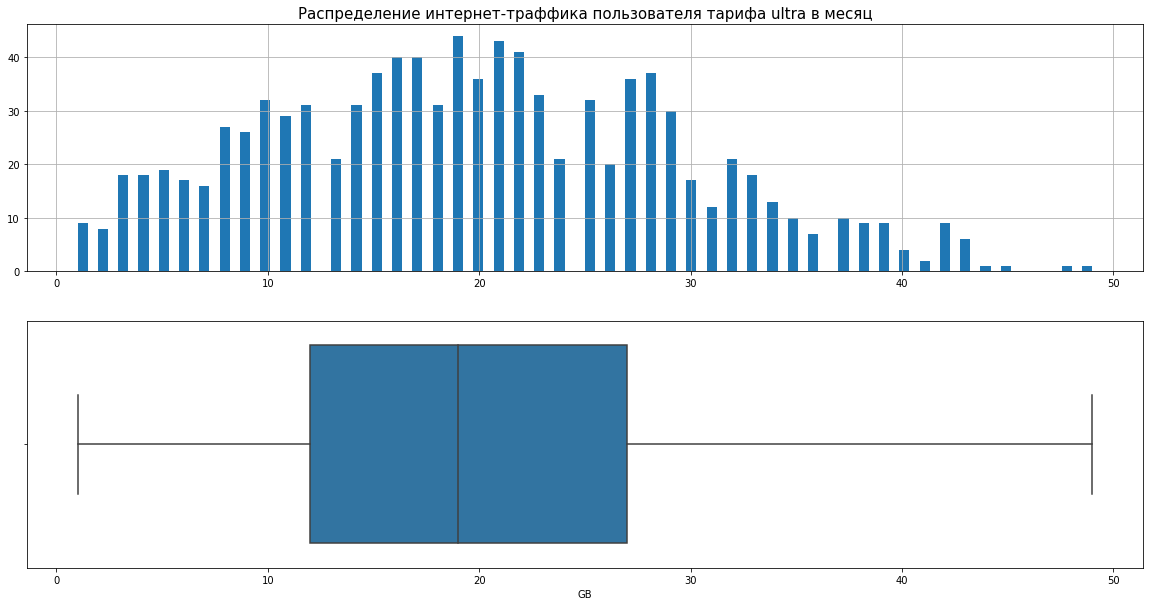

Рисунок 20. Гистограмма распределения интернет-траффика пользователя тарифа ultra в месяц


In [25]:
# расчет количества сессий, интернет-трафика, 
# среднего количества МВ на одну сессию пользователя тарифа ultra в месяц, 
# конвертация интернет-траффика из МВ в GB
avg_mb_per_month_ultra =(
    internet[internet['tariff'] == 'ultra']
    .groupby(['user_id', 'month'])
    .agg(
        mb_per_month_ultra = ('mb_used', 'sum'),
        session_cnt_per_month_ultra = ('id', 'count')
    )
    .reset_index()
    .assign(
        gb_per_month_ultra = lambda x: x['mb_per_month_ultra'].apply(convert_traffic),
        avg_mb_per_session_per_month_ultra = lambda x: x['mb_per_month_ultra'] / x['session_cnt_per_month_ultra']
    )
)

# отображение расчетной таблица траффика тарифа ultra
display(avg_mb_per_month_ultra.sample(5))
print('''Таблица 29. Количество сессий, интернет-трафика, 
среднего количества МВ на одну сессию пользователя тарифа ultra в месяц''')

# отображение статистик средней емкости интернет-сессии пользователя тарифа ultra в месяц
display(
    avg_mb_per_month_ultra['avg_mb_per_session_per_month_ultra']
    .describe()
    .to_frame()
    .rename(columns={'avg_mb_per_session_per_month_ultra': 'summary'})
)
print('Таблица 30. Статистики средней емкости интернет-сессии пользователя тарифа ultra в месяц, МВ')

# визуализация статистик средней емкости интернет-сессии пользователя тарифа ultra в месяц
plt.figure(figsize=(20, 15))

plt.subplot(2, 1, 1)
avg_mb_per_month_ultra['avg_mb_per_session_per_month_ultra'].hist(bins=100)
plt.title('Распределение средней емкости интернет-сессии пользователя тарифа ultra в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_mb_per_month_ultra['avg_mb_per_session_per_month_ultra'])
plt.xlabel('')

plt.show()
print('Рисунок 18. Гистограмма распределения средней емкости интернет-сессии пользователя тарифа ultra в месяц')

# отображение статистик количества интернет-сессий пользователя тарифа ultra в месяц
display(
    avg_mb_per_month_ultra['session_cnt_per_month_ultra']
    .describe()
    .to_frame()
    .rename(columns={'session_cnt_per_month_ultra': 'summary'})
)
print('Таблица 31. Статистики количества интернет-сессий пользователя тарифа ultra в месяц')

# визуализация статистик количества интернет-сессий пользователя тарифа ultra в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
avg_mb_per_month_ultra['session_cnt_per_month_ultra'].hist(bins=100)
plt.title('Распределение количества интернет-сессий пользователя тарифа ultra в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_mb_per_month_ultra['session_cnt_per_month_ultra'])
plt.xlabel('Сессии')

plt.show()
print('Рисунок 19. Гистограмма распределения количества интернет-сессий пользователя тарифа ultra в месяц')

# отображение статистик интернет-траффика пользователя тарифа ultra в месяц
display(
    avg_mb_per_month_ultra['gb_per_month_ultra']
    .describe()
    .to_frame()
    .rename(columns={'gb_per_month_ultra': 'summary'})
)
print('Таблица 32. Статистики интернет-траффика пользователя тарифа ultra в месяц, GB')

# визуализация статистик интернет-траффика пользователя тарифа ultra в месяц
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
avg_mb_per_month_ultra['gb_per_month_ultra'].hist(bins=100)
plt.title('Распределение интернет-траффика пользователя тарифа ultra в месяц', fontsize=15)

plt.subplot(2, 1, 2)
sns.boxplot(avg_mb_per_month_ultra['gb_per_month_ultra'])
plt.xlabel('GВ')

plt.show()
print('Рисунок 20. Гистограмма распределения интернет-траффика пользователя тарифа ultra в месяц')

Из 974 элементов состоит выборка траффика пользователей тарифа ultra. По указанному объему данных оценим поведение клиентов указанной категории в разрезе пользования сетью Интренет.

**Средняя емкость интернет-сессии пользователя тарифа ultra в месяц** составляет 530 МВ, практически равна медине в 531 МВ. Стандартное отклонение в 56 МВ, при размахе выборке в 490 МВ и межквартильном размахе в 167 МВ свидетельствует о достаточно узком и симметричном, близком к нормальному распределению, с референтным значением в интервал от 418 МВ до 643 МВ и выбросами за пределами менее 398 МВ и более 665 МВ.

**Среденее количество интернет-сессиий польователя тарифа ultra в месяц** равно 37 сессиям, при идентичной медиане.Однако, распределение хоть и семметричное и унимодальное, тяготеющее к нормальному, достаточно широкое от 1 сессии до 94 сессии, при двух выбросах: значениях более 91 сессии и пологое от 23 сессий первого квартиля до 50 сессиий тертьего квартиля.

Таким же широким и пологим явлеться распределение **суммарного объема интернет-траффика пользователя тарифа ultra в месяц** со средним в 19,71 GB, медианой в 19 GB, стандартным отклонением в 9,68 GB минимумом в 1 GB, максимумов в 49 GB. Межквартильный размах в 15 GB покрывает максимумы и минимумы выборки - выбросов нет. 

**Вывод**

Таким образом, поведения клиентов разных тарифов достаточно вариативны и отличны друг от друга. Клиенты тарифных планов адоптируют выбираемые тарифы под свои потребности и за редким исключением выходят за пределы лимитов тарифов. Что было отмечено автором, при анализе выручки тарифных планов.

Так, превышение лимита в 3000 мин в месяц на тарифном плане ultra не допускает ни один из представленной в выборке пользователь; на тарифном плане smart лимит в 500 мин в месяц превышает порядка 15% пользователей.

Превышение лимита в 1000 сообщений в месяц на тарифном плане ultra не допускает ни один из представленной в выборке пользователь; на тарифном плане smart лимит в 50 сообщений в месяц превышает порядка 25% пользователей.

Превышение лимита на 30 GB в месяц на тарифе ultra  допускают порядка 15% пользователей; на тарифе smart лимит в 15 GB в месяц превышают половина пользователей.

Превышение лимитов формируют дополнительную выручку опреатора. При этом выручка тарифа ultra более стабильна на всем временном периоде анализа, а ее дополнительная часть формируется лишь малой долей пользователей за счет превышение лимита на интренет-траффик. Пользователи тарифа smart допускают превышение по всем позициям поведения клиента на всем исследуемом временном промежутке, при постоянном увелеичении пределов указанного превышения, в связи с чем выручка растет линейно.

Данные обстоятельства были описаны автором в разделе анализа выручке. В данном разделе выводы дополнитлеьно подтверждают декмопозицией по составляющим частям выручки.

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем "нулевую" и "альтернативную" гипотезы. Н0: средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт". Н1: средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт".

Таким образом, проверки подлежит гипотеза о равенстве средних двух генеральных совокупностей.

Далее исходим из предположений, что во-первых, популяция пользователей тарифов значительны и рассчитать среднее генеральной совакупности не представляется возможным, во-вторых, представленные на анализ данные явлются сами по себе ограниченной выборкой за период 2018 года (вопросы формирования, представленной на анализ выборке находятся вне рамок настоящего исследования).

Таким образом, проверки обозначенной гипотезы представлятся возможным использовать t-критерий Стьюдента.

Опишем условия применения параметрического теста:

- независимость популяций;

Для целей настоящего исследования будем исходить из предположения, что пользователи тарифовного плана "Ультра" ранее не пользовались тарифным планом "Смарт" и наоборот. Данную предпосылку автор связывает во-первых, отсутсвия сведений о таком условии в задании к Проекту, во-вторых ограниченности данных - анализируемый период 2018 года, представлены сведения (выборка) о пятиста уникальных пользователях, каждый из которых применяет уникальный тариф - "Смарт" или "Ультра". Таким образом, пользователи явлются взаимоисключаемыми (пользователь примеяет или тариф "Смарт" или тариф "Ультра" и исчерпывающими (пользователь обязательно применят один из двух представленных тарифов).

- выборочные средние нормально распределены;

Согласно Теореме центрального предела не зависимо о типа (вида, формы) распределения генеральной совокупности, распределения средних значений достаточно большого числа выборок, состоящих из достаточно большого числа элементов будет распределено "нормально", относительно "истинного" среднего популяции. Эмпирическим путем доказано, что достаточно выборки в 30 элементов, чтобы распределение Стьюденты было ассимптотически эквивалентно стандартному нормальному распределению. При этом, на выборках доверительные интервалы распределения Стьюдента шире и надёжнее. В рамках настоящего Исследования, представлется возможным извлеч в выборку в 500 наблюдений. Таким образом, требование нормальности распределения данных для точного t-теста выполняются.

- равенство дисперсий популяций;

t-статистика строится обычно по следующему общему принципу: в числителе — случайная величина с нулевым математическим ожиданием (при выполнении "нулевой" гипотезы), а в знаменателе — выборочное стандартное отклонение этой случайной величины, получаемое как квадратный корень из несмещённой оценки дисперсии. В условиях проекта подробно описаны тарифы, которые в превую очередь отличаються между собой ценой (проверке подлежат "денежные" гипотезы) и другими параметрами, в связи с чем есть основания полагать, что пользователи тарифов "пришли" из разных генеральных совакупностей, поэтому утверждать равенство дисперсий сомнительно в данном случае. "Сгладить" параметр неравенста дисперсий поможет достаточное количество наблюдений (986 и 2230 соответсвенно).

Рассчитаем t-статистику, р-уровень значимости и примем решение по гипотезам.





,summary
count,986.000000
mean,2070.030426
std,376.015578
min,1950.000000
25%,1950.000000
50%,1950.000000
75%,1950.000000
max,4800.000000


Таблица 33. Статистики выборки месячной выручки тарифа ultra


,summary
count,2230.000000
mean,1289.641704
std,818.370799
min,550.000000
25%,550.000000
50%,1021.000000
75%,1750.000000
max,6770.000000


Таблица 34. Статистики выборки месячной выручки тарифа smart


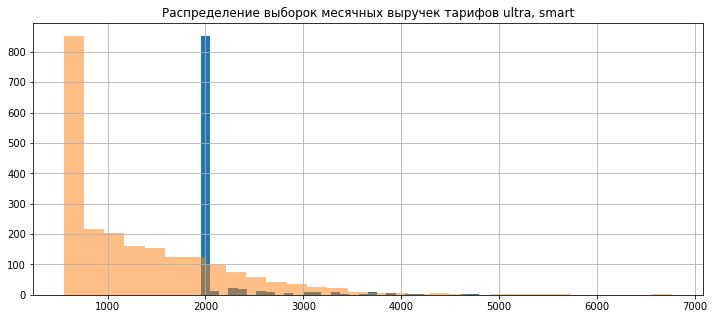

Рисунок 21. Гистограммы распределений выборок месячных выручек тарифов ultra, smart

Проверка гипотезы о равенстве средних двух генеральных совокупностей

p-значение:  1.927011394420941e-250
Есть основания отвергнуть Н0


In [26]:
# отбор данных для проверки гипотезы
month_revenue_ultra = month_revenue[month_revenue['tariff'] == 'ultra']['total_revenue_per_month']

month_revenue_smart = month_revenue[month_revenue['tariff'] == 'smart']['total_revenue_per_month']

# статистики выборок
display(month_revenue_ultra
        .describe()
        .to_frame()
        .rename(columns={'total_revenue_per_month': 'summary'}))
print('Таблица 33. Статистики выборки месячной выручки тарифа ultra')

display(month_revenue_smart
        .describe()
        .to_frame()
        .rename(columns={'total_revenue_per_month': 'summary'}))
print('Таблица 34. Статистики выборки месячной выручки тарифа smart')

# визуализация распределений выборок
plt.figure(figsize=(12, 5))

month_revenue_ultra.hist(bins=30)
month_revenue_smart.hist(bins=30, alpha=.5)

plt.title('Распределение выборок месячных выручек тарифов ultra, smart')
plt.show()
print('Рисунок 21. Гистограммы распределений выборок месячных выручек тарифов ultra, smart')

# проверка гипотезы о равенстве средних двух генеральных совокупностей
alpha = .05

results = st.ttest_ind(
    month_revenue_ultra, 
    month_revenue_smart,
    equal_var = False
)

print()
print('Проверка гипотезы о равенстве средних двух генеральных совокупностей')
print()
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Есть основания отвергнуть Н0")
else:
    print("Оснований отвергнуть Н0 - нет")


**Вывод**

Таким образом, значение p-value явно меньше порогового значения в 0.05, есть основания отвернуть "нулевую" гипотезу, т.е. есть основания считать, что средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт".

Стоит отметить, во-первых нет возможности абсолютно точно утверждать что средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт", в связи недостатком данных, либо до тех пор, пока не будет доказано обратное. Представляется вожность указать лиь на то, что имеются статистически значимые различия. 

Во-вторых, в настоящем Исследовании не рассматриваются вопросы ошибок первого и второго рода и соответсвенно точность и мощность тестов.

Пороговое значение "альфы", как вероятность ошибки первого рода (точность теста) будем устанавливать в текущем Проекте, как 0.05, а пороговое значение "бета", как вероятность ошибки второго рода и соответсвенно мощность теста, как 1-"бета" вообще не учитывать не будем, т.е. Исследование не ставит целью рассчитывать размер (объем) необходимой выборки и критериев точности и мощности применяемого теста.

Резюмируя. Выборки уже даны (рассчитывать их не надо), эффект наблюдаем, делаем вывод только о том, является он случайным или нет.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Автор использует аналогичные рассуждения и в рамках проверки текущей гипотезы.

Н0: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;

Н1: средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.

Проверки подлежит о равенстве средних двух генеральных совокупностей.

Популяции независимы (пользователи из Москвы ранее не проживали в других регионах и наоборот); выборочные среднее распределены нормально (ЦПТ); дисперсии не равны (популяция пользоватлей из Москвы достаточно отличается по покупальско способности от пользователей из других регионов).

Рассчитаем t-статистику, р-уровень значимости и примем решение по гипотезам.

,summary
count,611.000000
mean,1546.713584
std,752.088071
min,550.000000
25%,780.500000
50%,1750.000000
75%,1950.000000
max,5321.000000


Таблица 35. Статистики выборки месячной выручки пользователей из Москвы


,summary
count,2605.000000
mean,1524.725144
std,808.745680
min,550.000000
25%,750.000000
50%,1583.000000
75%,1950.000000
max,6770.000000


Таблица 36. Статистики выборки месячной выручки пользователей из других регионов


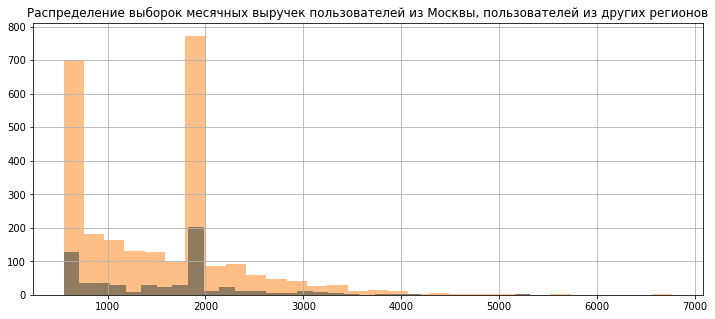

Рисунок 22. Гистограммы распределений выборок месячных выручек пользователей из Москвы, 
пользователей из других регионов

Проверка гипотезы о равенстве средних двух генеральных совокупностей

p-значение:  0.5216952110000278
Оснований отвергнуть Н0 - нет


In [27]:
# отбор данных для проверки гипотезы
month_revenue_moscow = month_revenue[month_revenue['city'] == 'Москва']['total_revenue_per_month']

month_revenue_other = month_revenue[month_revenue['city'] != 'Москва']['total_revenue_per_month']

# статистики выборок
display(month_revenue_moscow
        .describe()
        .to_frame()
        .rename(columns={'total_revenue_per_month': 'summary'}))
print('Таблица 35. Статистики выборки месячной выручки пользователей из Москвы')

display(month_revenue_other
        .describe()
        .to_frame()
        .rename(columns={'total_revenue_per_month': 'summary'}))
print('Таблица 36. Статистики выборки месячной выручки пользователей из других регионов')

# визуализация распределений выборок
plt.figure(figsize=(12, 5))

month_revenue_moscow.hist(bins=30)
month_revenue_other.hist(bins=30, alpha=.5)

plt.title('Распределение выборок месячных выручек пользователей из Москвы, пользователей из других регионов')
plt.show()
print('''Рисунок 22. Гистограммы распределений выборок месячных выручек пользователей из Москвы, 
пользователей из других регионов''')

# проверка гипотезы о равенстве средних двух генеральных совокупностей
alpha = .05

results = st.ttest_ind(
    month_revenue_moscow, 
    month_revenue_other,
    equal_var = False
)

print()
print('Проверка гипотезы о равенстве средних двух генеральных совокупностей')
print()
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Есть основания отвергнуть Н0")
else:
    print("Оснований отвергнуть Н0 - нет")

**Вывод**

Таким образом, p-value превышает заданное пороговое значение. Оснований отвергнуть НО: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов, - нет. 

## Выводы

1. На исследование представлено два тарифных плана: «Смарт» и «Ультра» телеком-компании «Мегалайна». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 

В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Требуется проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Тариф *«Смарт»*

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф *«Ультра»*

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Лучшим тарифом следует признать тариф, приносящий наибольшую выручку оператору. Таким образом, в ходе исследования будет определено количество минут разговора, отправленных сообщений и интернет-траффика типичного пользователя тарифа, учтены включенные лимиты пакетов тарифов и определена средняя выручка по пользователю в месяц.

2. «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Фрейм со звонками пользователей содержит 202607 записи (наблюдений) в категории звонки абонетов, сгруппированные по четерем признакам: уникальный номер записи, дата и продолжительность звонка (в том числе округленная, согласно условиям тарифа), уникальный номер абонента.

Файл со сведениями по интернет-трафику содержит информацию о количестве переданных по-средствам сети Internet данных. Всего 149396 записей (наблюдений) сгруппированных по пяти признакам: уникальный номер записи, количество использованных MB траффика, дата сессии, уникальный идентификатор пользователя, количество использованных GB траффика.

Файл с информацией о сообщениях пользователей содержит 123036 записи (наблюдения) содержание сведения об уникальном номере записи, дате отправке сообщения и уникальном идентификаторе абонента.

3. За анализируемый период количество звонков и продолжительность разговоров возрастают линейно на протяжении всего исследуемого отрезка времени, начиная с 1164 звонков в января и заканчивая 27385 звонками на пике в декабре; начиная с 10206 минут разговоров в январе и заканчивая 230010 минут разговоров в декабре.

При этом, растет и средняя продолжительность расзговора (растояние между графиками количества звонков и продолжительности разговоров увеличиваеться ближе к концу анализируемого периода, значит продолжительноть разговоров растет быстерее, чем количество звонков, кроме того, угол графика продолжительности разговоров больше угла наклона графика количства звонков, значит скороть события, описывемого график быстрее).

Аналогично статистки по звонкам, количество соообщений отправленых по месячно растет линейно на протяжении всего анализируемого периода, начиная с 924 сообщений в января, заканчивая пиком в 20555 сообщений в декабре.

И количество сессий и объем интернет траффика на протяжении всего анализируемого периода растут линенйно, начиная с 407732 МВ в январе, заканчивая 9133555 МВ на пике в декабре; начиная с 966 сессий в январе, заканчивая 24478 сессиями в декабре. 

При этом, возрастает и средняя продолжительность одной сессии (расстояние между графиками интернет-трафиика и количества сессий увеличивает, значит трафиик растет быстрее, чем число сессий).

4. Средняя помесячная выручка тарифа ultra с каждого абонента, начиная с марта 2018 года стабильно превышает отметку в 2000 рублей на протяжении всего исследуемого периода с провалом в апреле 2018 года в значение 2001 рублей и пиками в июле 2018 года и декабре 2018 года в значениях 2118 рублей и 2138 рублей. Что обуславливается стоимостью тарифного плана в 1965 рублей и выхода в сверхлимитные значения по звонкам, сообщениям и интернет-траффику пользователей тарифа, таким образом, формировая дополнительную выручка от использования тарифного плана.

Средняя помесячная выручка тарифа "Смарт" с каждого абонента стартует в январе 2018 года с отметки в 550 рублей и ростом в четыре пика в марте 2018 года (1164 рубля), июне 2018 года (1223 рублей), августе 2018 года (1320 рубля) и октябре 2018 года (1364 рубля) завершает рост отметкой 1578 рубля в декабре 2028 года. Стоимость пакета "Смарт" составлет 550 рублей, добавочная выручка образуеться за счет перерасхода лимитов по пакету услуг.

Далее проанализиуем поведение клиентов, с целью определения оптимальных параметров тарифов по количеству минут, сообщений и интренет-траффику.

Итак, помесячная выручка растет вследствии роста потребности киентов в минутах разговора, количестве сообщений и МВ траффика.

5. Представленные на исследование данные о телефонных соединениях пользователей позволяют оценить общую продолжительность телефонных разговоров в месяц, количество телефонных звонков, в том числе и не состоявшиеся разговоры, в месяц и среднюю продолжительность одного разговора пользователя в месяц, а также количество отправленных сообщений и интрернет-соединения, как в единичных емкостях сессий и количеств сессий в месяц, так и сумаррно объема траффика. Все в разрезе тарифной сетки.

Так, поведения клиентов разных тарифов достаточно вариативны и отличны друг от друга. Клиенты тарифных планов адоптируют выбираемые тарифы под свои потребности и за редким исключением выходят за пределы лимитов тарифов. Что было отмечено автором, при анализе выручки тарифных планов.

Так, превышение лимита в 3000 мин в месяц на тарифном плане ultra не допускает ни один из представленной в выборке пользователь; на тарифном плане smart лимит в 500 мин в месяц превышает порядка 15% пользователей.

Превышение лимита в 1000 сообщений в месяц на тарифном плане ultra не допускает ни один из представленной в выборке пользователь; на тарифном плане smart лимит в 50 сообщений в месяц превышает порядка 25% пользователей.

Превышение лимита на 30 GB в месяц на тарифе ultra  допускают порядка 15% пользователей; на тарифе smart лимит в 15 GB в месяц превышают половина пользователей.

Превышение лимитов формируют дополнительную выручку опреатора. При этом выручка тарифа ultra более стабильна на всем временном периоде анализа, а ее дополнительная часть формируется лишь малой долей пользователей за счет превышение лимита на интренет-траффик. Пользователи тарифа smart допускают превышение по всем позициям поведения клиента на всем исследуемом временном промежутке, при постоянном увелеичении пределов указанного превышения, в связи с чем выручка растет линейно.

Данные обстоятельства были описаны автором в разделе анализа выручке. В данном разделе выводы дополнитлеьно подтверждают декмопозицией по составляющим частям выручки.

6. В ходе Исследования проверены две гипотезы.

Первая. Н0: средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт". Н1: средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт".

Таким образом, проверки подлежит гипотеза о равенстве средних двух генеральных совокупностей.

Рассчитанное значение p-value не первышает порогового значения в 0.05, есть основания отвернуть "нулевую" гипотезу, т.е. есть основания считать, что средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт".

Стоит отметить, во-первых нет возможности абсолютно точно утверждать что средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт", в связи недостатком данных, либо до тех пор, пока не будет доказано обратное. Представляется вожность указать лиь на то, что имеются статистически значимые различия. 

Во-вторых, в настоящем Исследовании не рассматриваются вопросы ошибок первого и второго рода и соответсвенно точность и мощность тестов.

Пороговое значение "альфы", как вероятность ошибки первого рода (точность теста) будем устанавливать в текущем Проекте, как 0.05, а пороговое значение "бета", как вероятность ошибки второго рода и соответсвенно мощность теста, как 1-"бета" вообще не учитывать не будем, т.е. Исследование не ставит целью рассчитывать размер (объем) необходимой выборки и критериев точности и мощности применяемого теста.

Вторая гипотеза.

Н0: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;

Н1: средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.


Проверки подлежит о равенстве средних двух генеральных совокупностей.

Рассчитанное значение p-value превышает заданное пороговое значение. Оснований отвергнуть НО: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов, - нет. 